In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [4]:
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]
dataset["may13"] = ['1r69', '3icb', '256b', '4cpv', '2mhr', '1mba', '2fha', '1fc2', '1enh', '2gb1', '2cro', '1ctf', '4icb']

# pdb_list, steps = dataset["old"]

def get_data(pre, pdb_list, simType="all_simulations", n_rum=30, rerun=1, formatName=True):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        if formatName:
            name = p.lower()[:4]
        else:
            name = p
        for i in range(n_rum):
            for ii in range(rerun):
                location = pre + f"{simType}/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

# pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/database/2gb1/"
# fileName = "movie.pdb"
def splitPDB(pre, fileName):
    location = f"{pre}/{fileName}"
    with open(location, "r") as f:
        a = f.readlines()
    i = 0
    tmp = ""
    for line in a:
        tmp += line
    #     os.system(f"echo '{line}' >> {pre}frame{i}")
        if line == "END\n":
            with open(f"{pre}frame{i}.pdb", "w") as out:
                out.write(tmp)
            i += 1
            tmp = ""


import subprocess
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def getSize(p):
    protein = p.lower()[:4]
    pre = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/all_simulations/{protein}/{protein}/ssweight"
    a = getFromTerminal(f"wc {pre}")
#     print(a)
    n = int(a.split()[0])
    return n


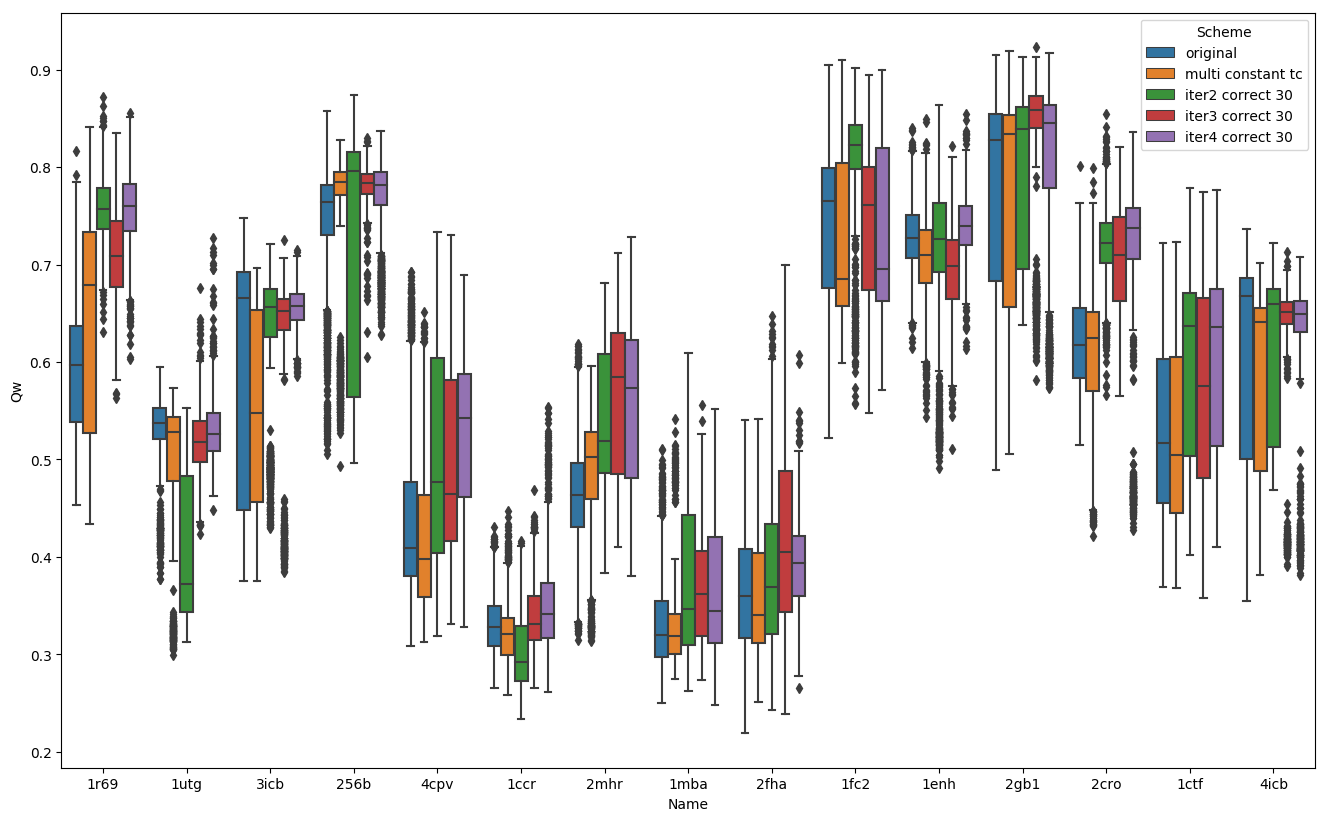

In [17]:
data1 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_single_memory_05-05.csv", index_col=0)

data2 = pd.read_csv("/Users/weilu/Research/data/optimization/original_single_memory_05-05.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/original_fragMemory_single_memory_05-06.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_fragMemory_single_memory_05-06.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/noContact_single_memory_05-06.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/iter0_single_memory_05-06.csv", index_col=0)
# data7 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_normalized_single_memory_05-06.csv", index_col=0)
data8 = pd.read_csv("/Users/weilu/Research/data/optimization/original_normalized_single_memory_05-07.csv", index_col=0)
data9 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_constraint_single_memory_05-07.csv", index_col=0)
data10 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_constant_tc_single_memory_05-10.csv", index_col=0)
data11 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_30_single_memory_05-12.csv", index_col=0)
data12 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_90_single_memory_05-12.csv", index_col=0)
data13 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_30_single_memory_05-15.csv", index_col=0)
# data14 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_90_single_memory_05-15.csv", index_col=0)
data15 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_30_single_memory_05-18.csv", index_col=0)
data16 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_90_single_memory_05-18.csv", index_col=0)

data17 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_30_correct_single_memory_05-19.csv", index_col=0)
data18 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_80_correct_single_memory_05-19.csv", index_col=0)

data19 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_30_correct_single_memory_05-20.csv", index_col=0)
data20 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_80_correct_single_memory_05-20.csv", index_col=0)

data21 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_30_correct_single_memory_05-21.csv", index_col=0)
data22 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_80_correct_single_memory_05-21.csv", index_col=0)

data23 = pd.read_csv("/Users/weilu/Research/data/optimization/iter4_30_correct_next_gen_simulations_05-23.csv", index_col=0)
data24 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_80_correct_single_memory_05-21.csv", index_col=0)

d = pd.concat([
    
#     data5.assign(Scheme="noContact_single"), 
#     data6.assign(Scheme="iter0"), 
    data2.assign(Scheme="original"), 
#     data8.assign(Scheme="original normalized"), 
    
#     data1.assign(Scheme="multi iter0"), 
    data10.assign(Scheme="multi constant tc"), 
    
    
#     data11.assign(Scheme="iter1"), 
#     data13.assign(Scheme="iter2"), 
#     data15.assign(Scheme="iter3"),
#     data17.assign(Scheme="iter1 correct 30"),
#     data18.assign(Scheme="iter1 correct 80"),
    data19.assign(Scheme="iter2 correct 30"),
#     data20.assign(Scheme="iter2 correct 80"),
    data21.assign(Scheme="iter3 correct 30"),
#     data22.assign(Scheme="iter3 correct 80"),
    
    data23.assign(Scheme="iter4 correct 30"),
#     data16.assign(Scheme="iter3_90"),
#     data14.assign(Scheme="iter2_90"), 
    
#     data12.assign(Scheme="iter1_90"), 
#     data9.assign(Scheme="multi iter0 constraint"), 
#     data7.assign(Scheme="multi iter0 normalized"), 
     
#     data3.assign(Scheme="original_frag"),  
#     data4.assign(Scheme="multi_iter0_frag"),  
     
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


In [32]:
print([p.lower()[:4] for p in dataset["combined"]])

['1r69', '1utg', '3icb', '256b', '4cpv', '1ccr', '2mhr', '1mba', '2fha', '1fc2', '1enh', '2gb1', '2cro', '1ctf', '4icb']


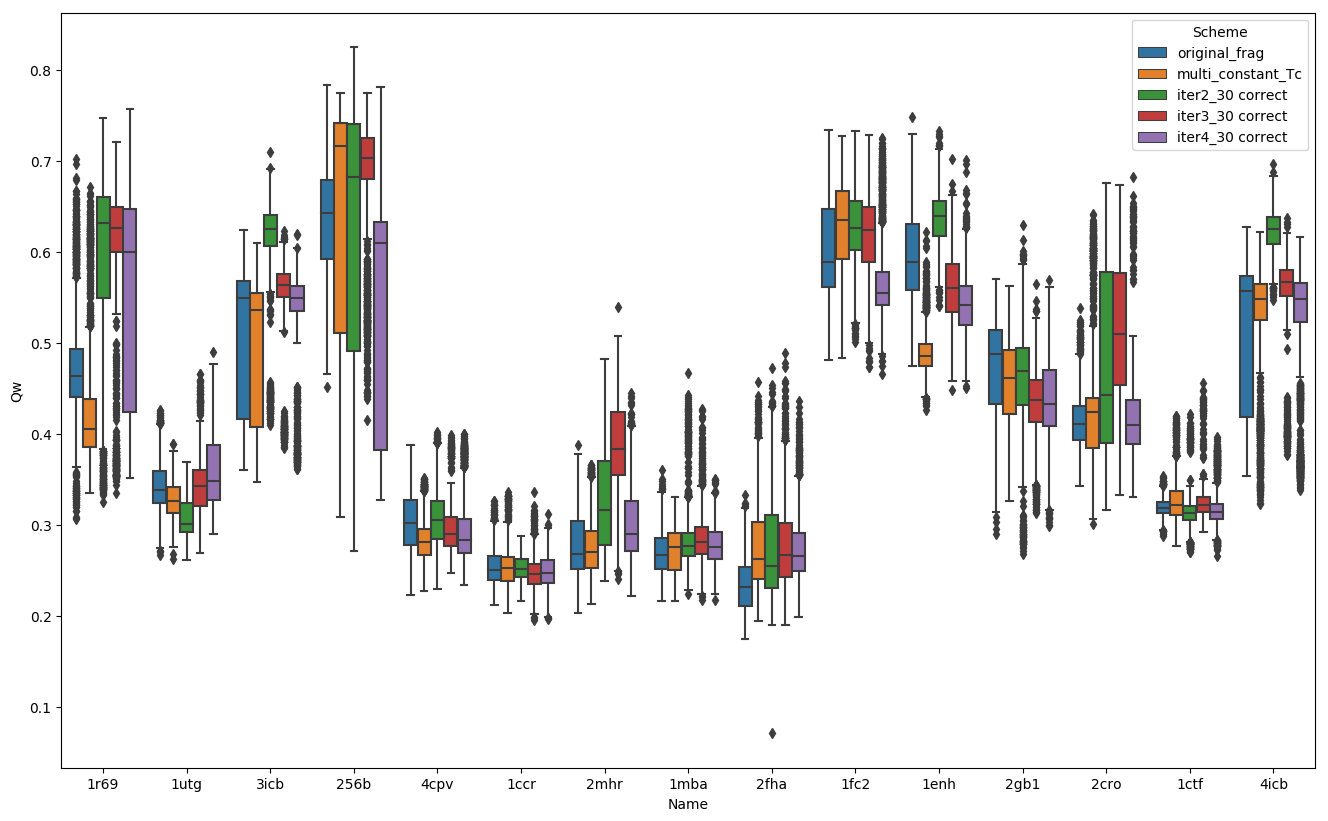

In [19]:
data1 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_single_memory_05-05.csv", index_col=0)

data2 = pd.read_csv("/Users/weilu/Research/data/optimization/original_single_memory_05-05.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/original_fragMemory_single_memory_05-06.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_fragMemory_single_memory_05-06.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/noContact_single_memory_05-06.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_constant_tc_frag_single_memory_05-10.csv", index_col=0)
data7 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_30_frag_single_memory_05-13.csv", index_col=0)
data8 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_10_frag_single_memory_05-13.csv", index_col=0)
data9 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_90_frag_single_memory_05-13.csv", index_col=0)
data10 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_30_frag_single_memory_05-15.csv", index_col=0)
data11 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_90_frag_single_memory_05-15.csv", index_col=0)
data12 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_30_frag_single_memory_05-17.csv", index_col=0)
data13 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_90_frag_single_memory_05-17.csv", index_col=0)


data14 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_30_correct_frag_single_memory_05-19.csv", index_col=0)
data15 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_80_correct_frag_single_memory_05-19.csv", index_col=0)

data16 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_30_correct_frag_single_memory_05-20.csv", index_col=0)
data17 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_80_correct_frag_single_memory_05-20.csv", index_col=0)

data18 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_30_correct_frag_single_memory_05-21.csv", index_col=0)
data19 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_80_correct_frag_single_memory_05-21.csv", index_col=0)

data20 = pd.read_csv("/Users/weilu/Research/data/optimization/iter4_30_correct_frag_next_gen_simulations_05-23.csv", index_col=0)
data21 = pd.read_csv("/Users/weilu/Research/data/optimization/iter4_80_correct_frag_next_gen_simulations_05-24.csv", index_col=0)
data22 = pd.read_csv("/Users/weilu/Research/data/optimization/iter4_2_100_correct_frag_correct_next_gen_simulations_05-25.csv", index_col=0)


d = pd.concat([
#     data5.assign(Scheme="noContact_single"), 
#     data2.assign(Scheme="original"), 
#     data1.assign(Scheme="multi iter0"), 
     
    data3.assign(Scheme="original_frag"),  
#     data4.assign(Scheme="multi_iter0_frag"),  
    data6.assign(Scheme="multi_constant_Tc"),
    
#     data7.assign(Scheme="iter1_30"),
#     data10.assign(Scheme="iter2_30"),
#     data12.assign(Scheme="iter3_30"),
    
#     data14.assign(Scheme="iter1_30 correct"),
#     data15.assign(Scheme="iter1_80 correct"),
    
    data16.assign(Scheme="iter2_30 correct"),
#     data17.assign(Scheme="iter2_80 correct"),
    
    
    data18.assign(Scheme="iter3_30 correct"),
#     data19.assign(Scheme="iter3_80 correct"),
    
    data20.assign(Scheme="iter4_30 correct"),
#     data21.assign(Scheme="iter4_80 correct"),
#     data22.assign(Scheme="iter4_100 correct"),
#     data13.assign(Scheme="iter3_90"),
#     data11.assign(Scheme="iter2_90"),
#     data8.assign(Scheme="iter1_10")
#     data9.assign(Scheme="iter1_90"),
     
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


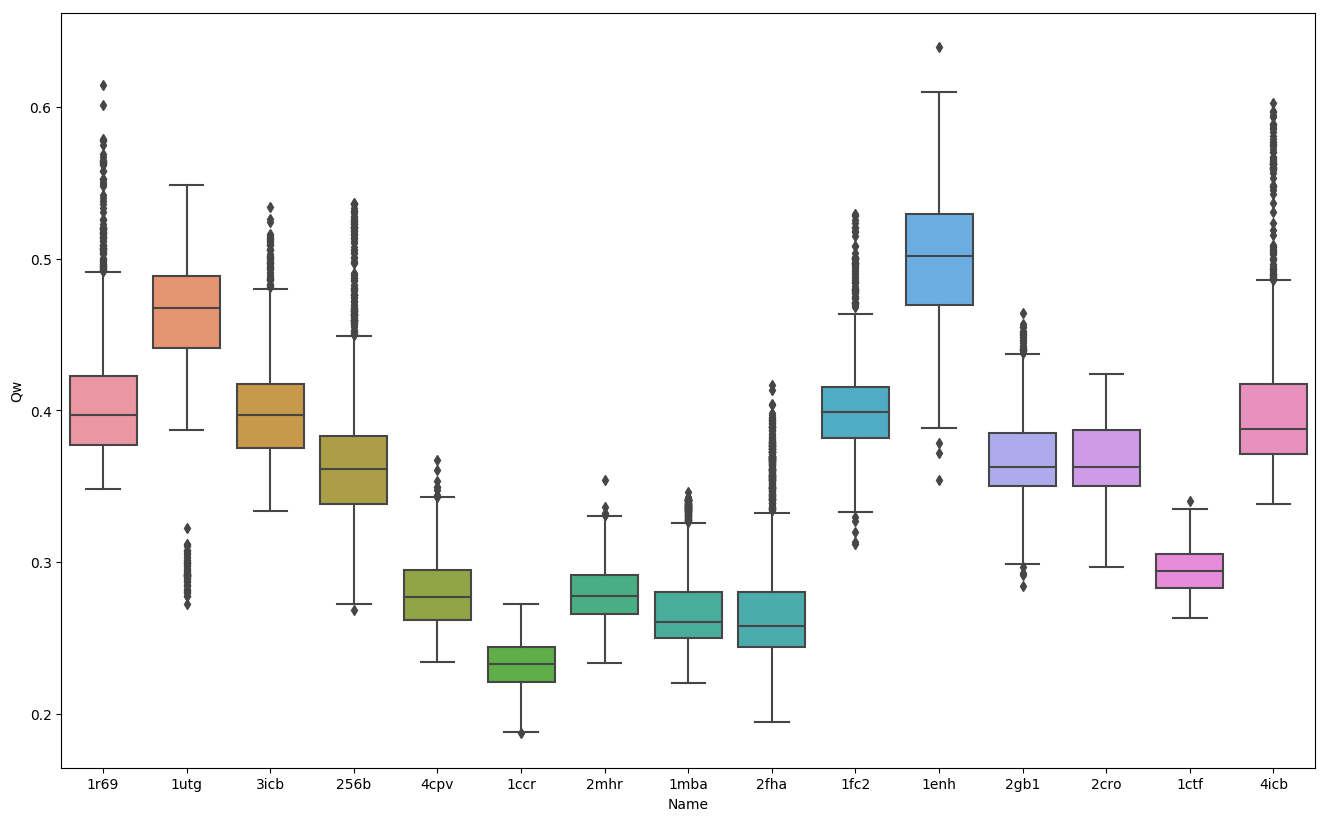

In [5]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "next_gen_simulations"
pre = pre + folder + "/"
simulationType = "iter4_2_100_correct_frag_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

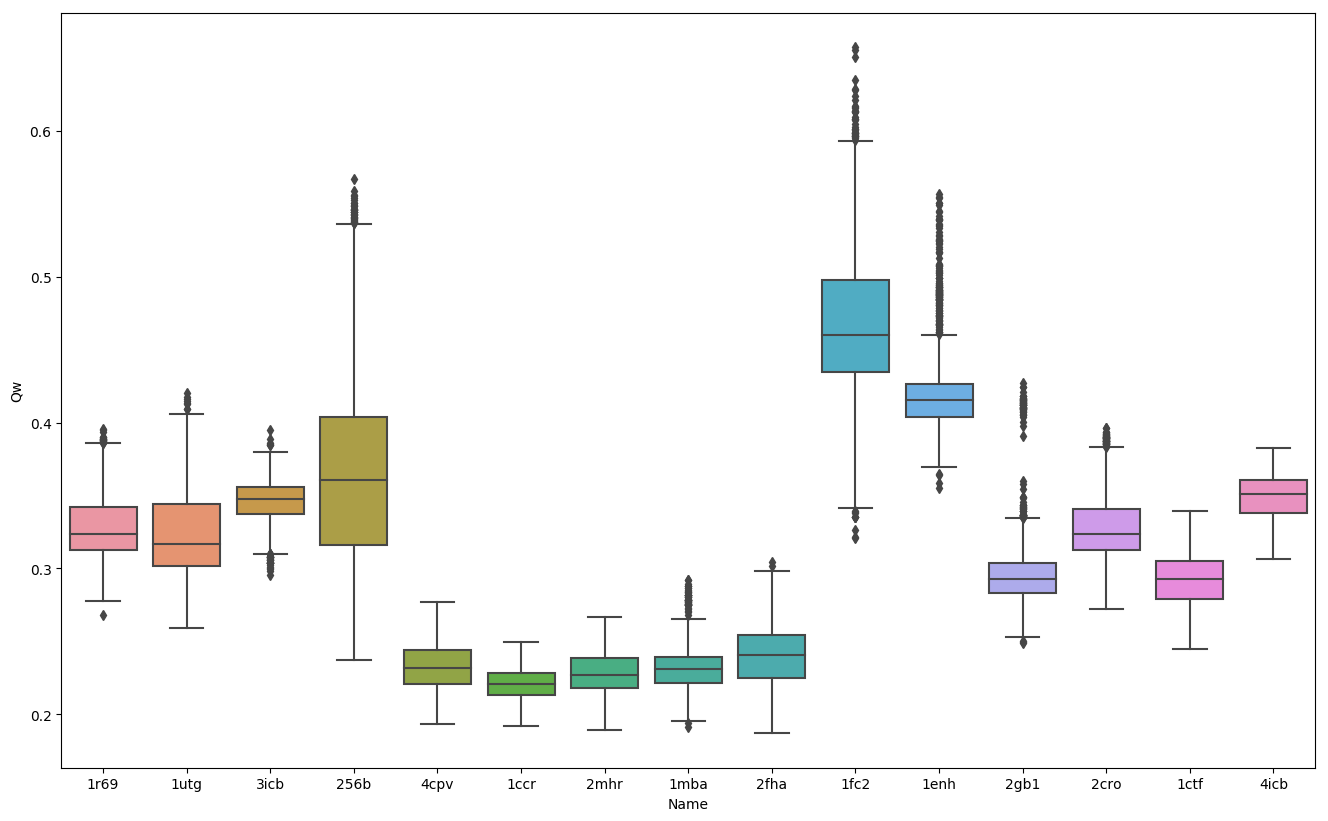

In [107]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "next_gen_simulations"
pre = pre + folder + "/"
simulationType = "iter4_2_100_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

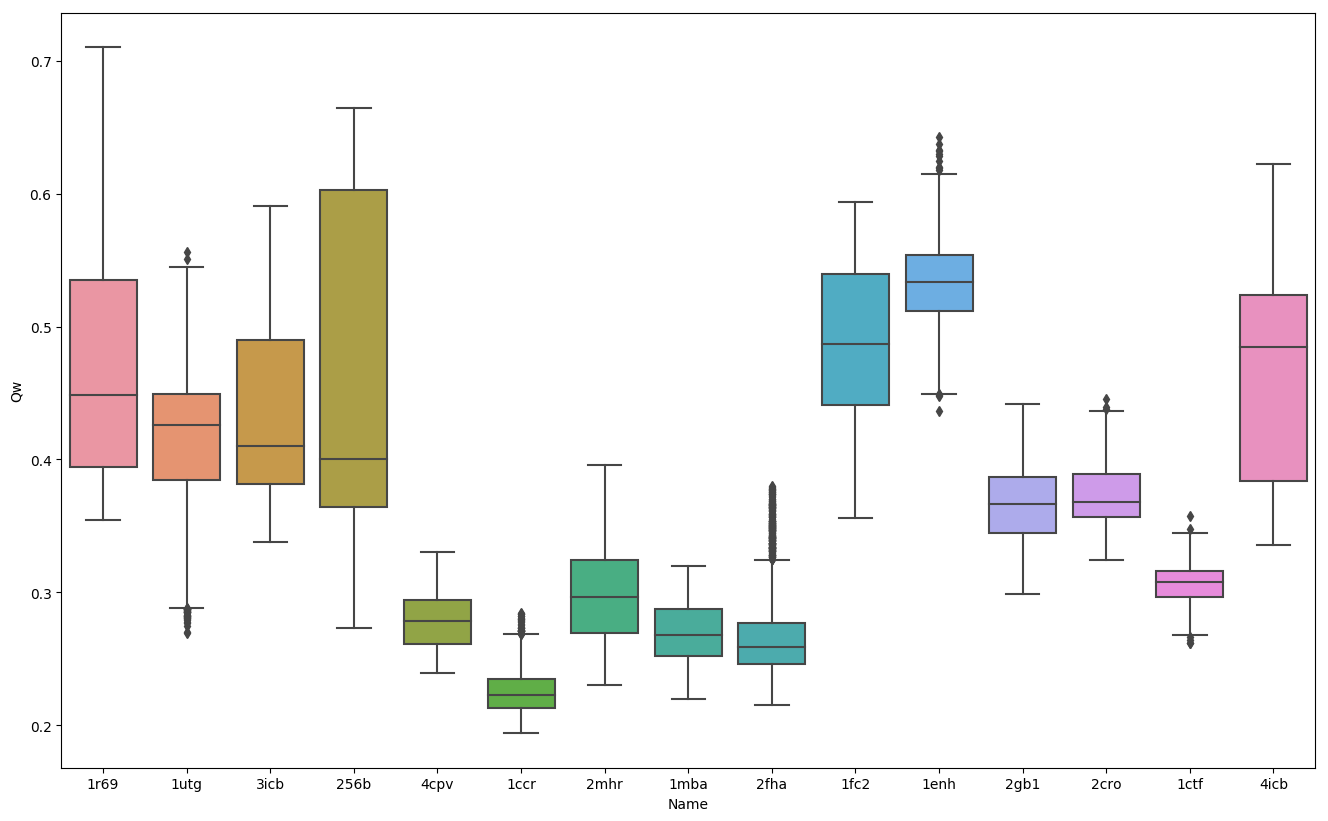

In [106]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "next_gen_simulations"
pre = pre + folder + "/"
simulationType = "iter4_80_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

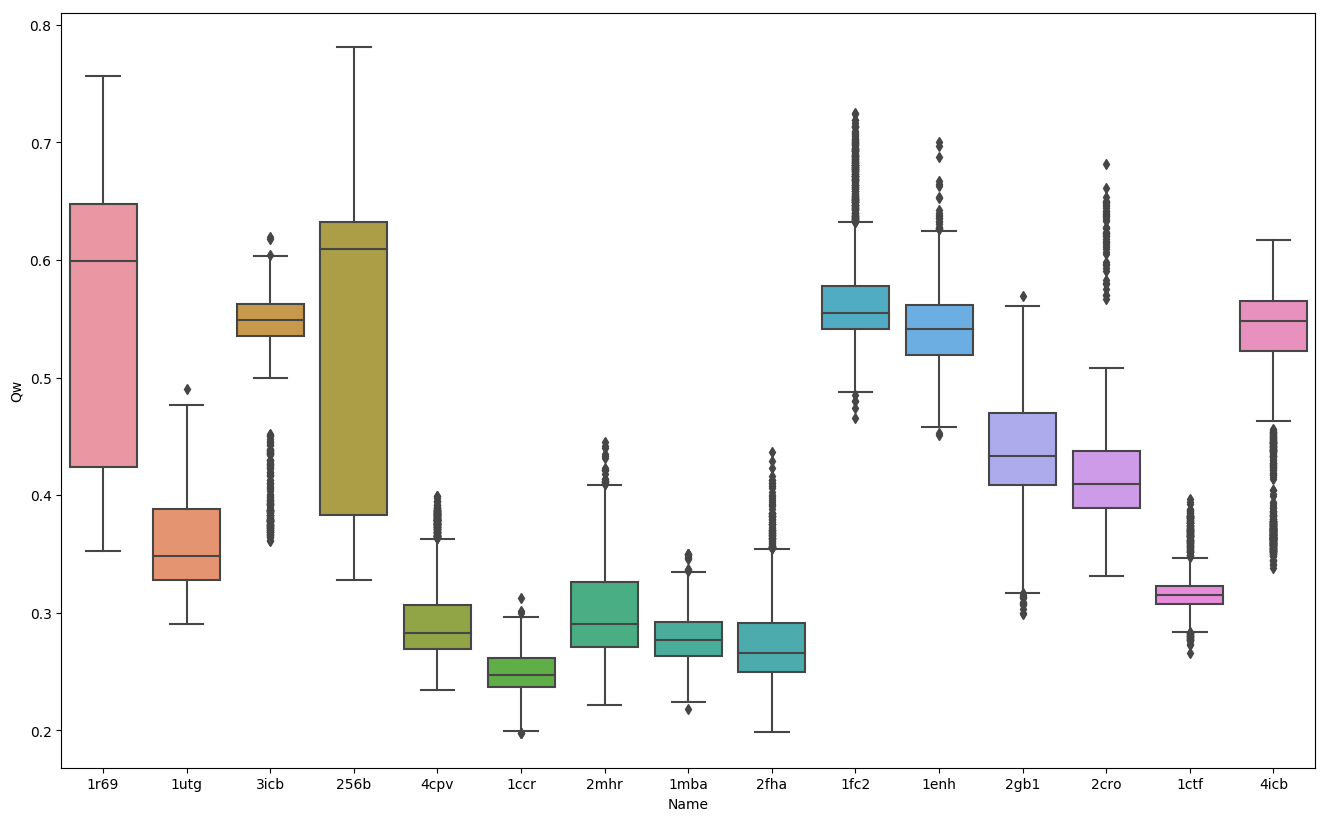

In [105]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "next_gen_simulations"
pre = pre + folder + "/"
simulationType = "iter4_30_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

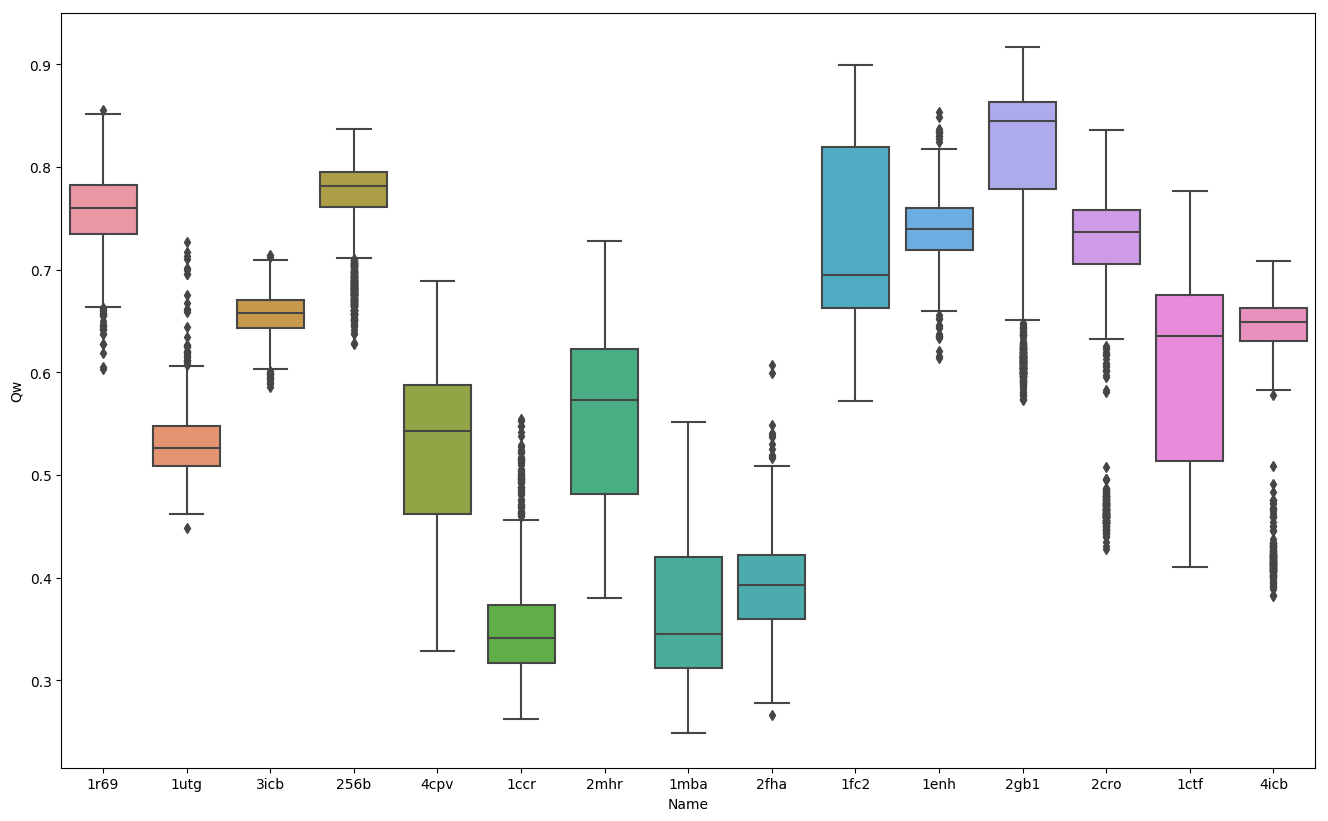

In [103]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "next_gen_simulations"
pre = pre + folder + "/"
simulationType = "iter4_30_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

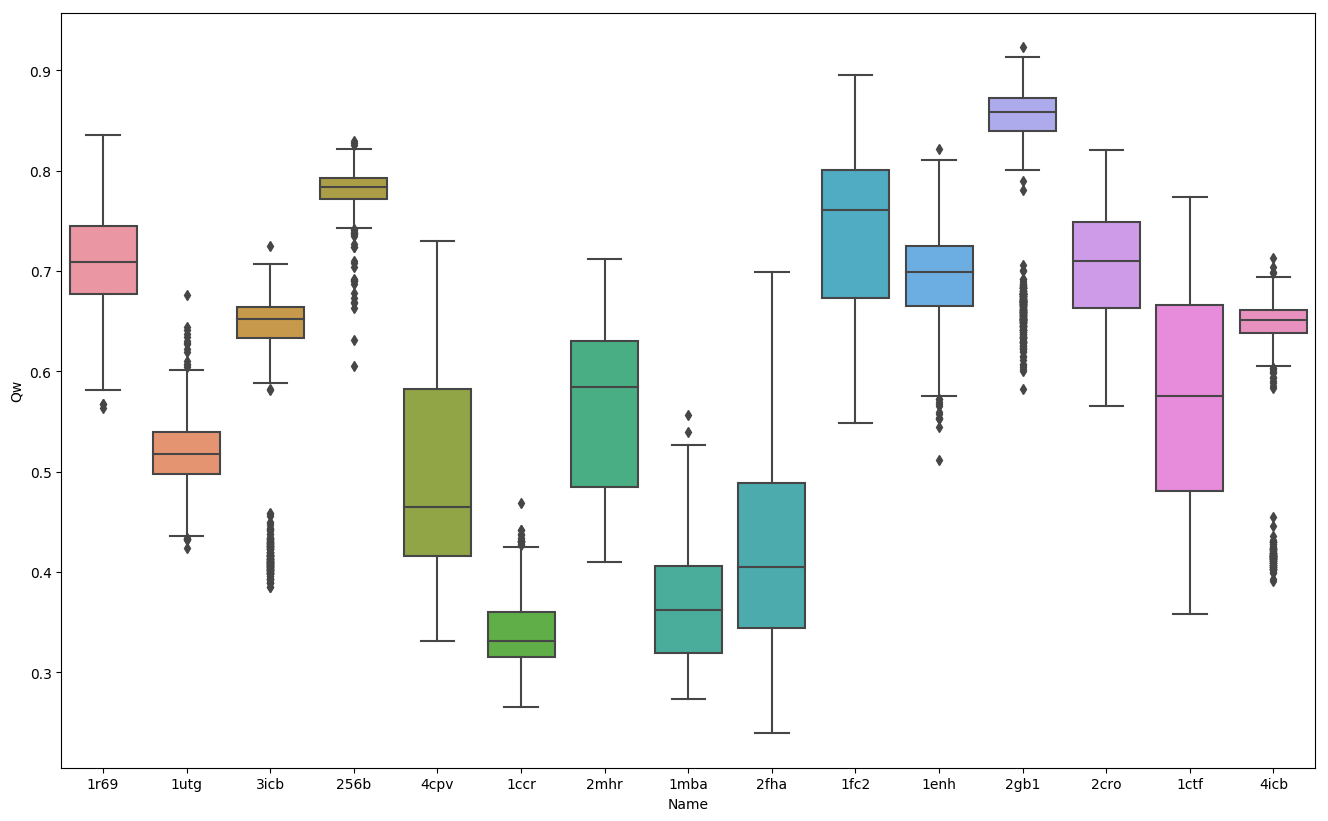

In [88]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_30_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

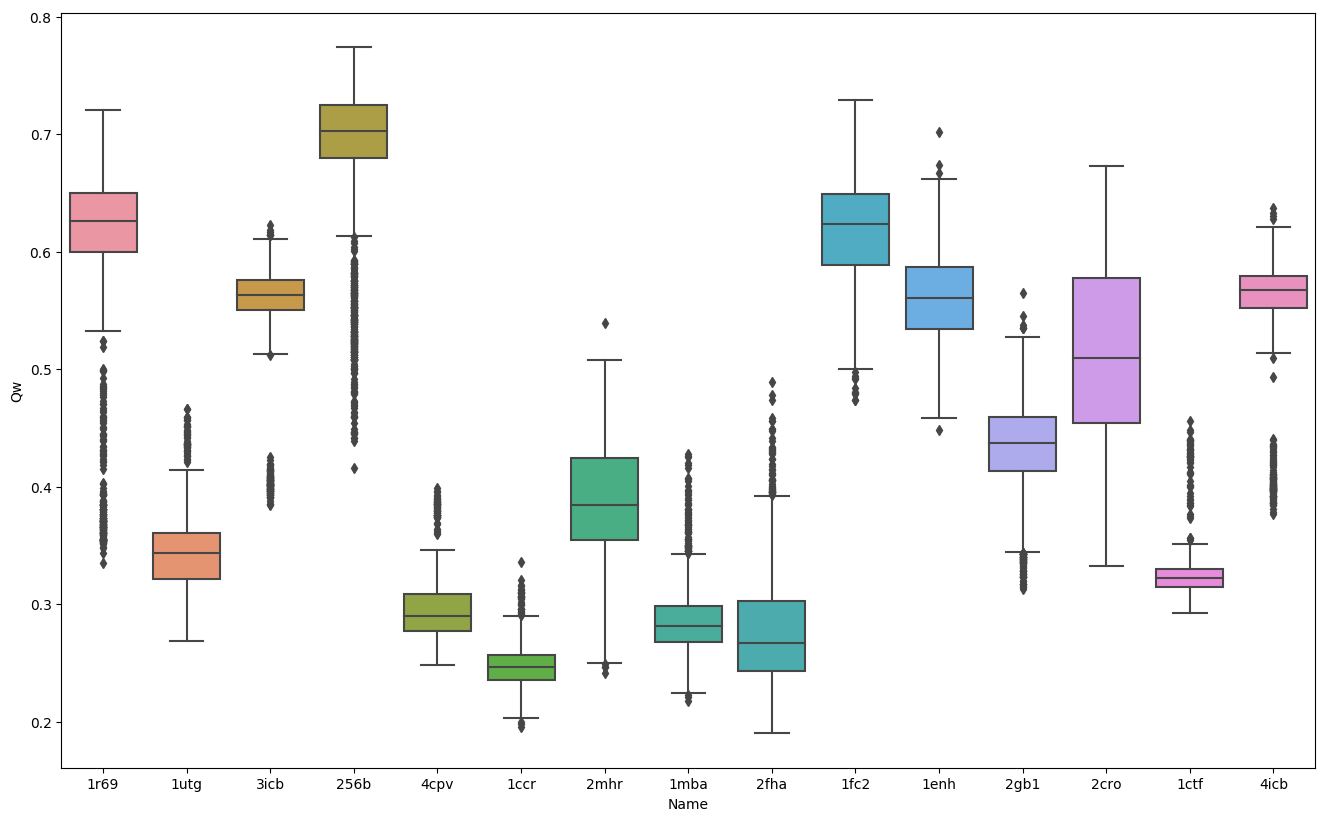

In [89]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_30_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

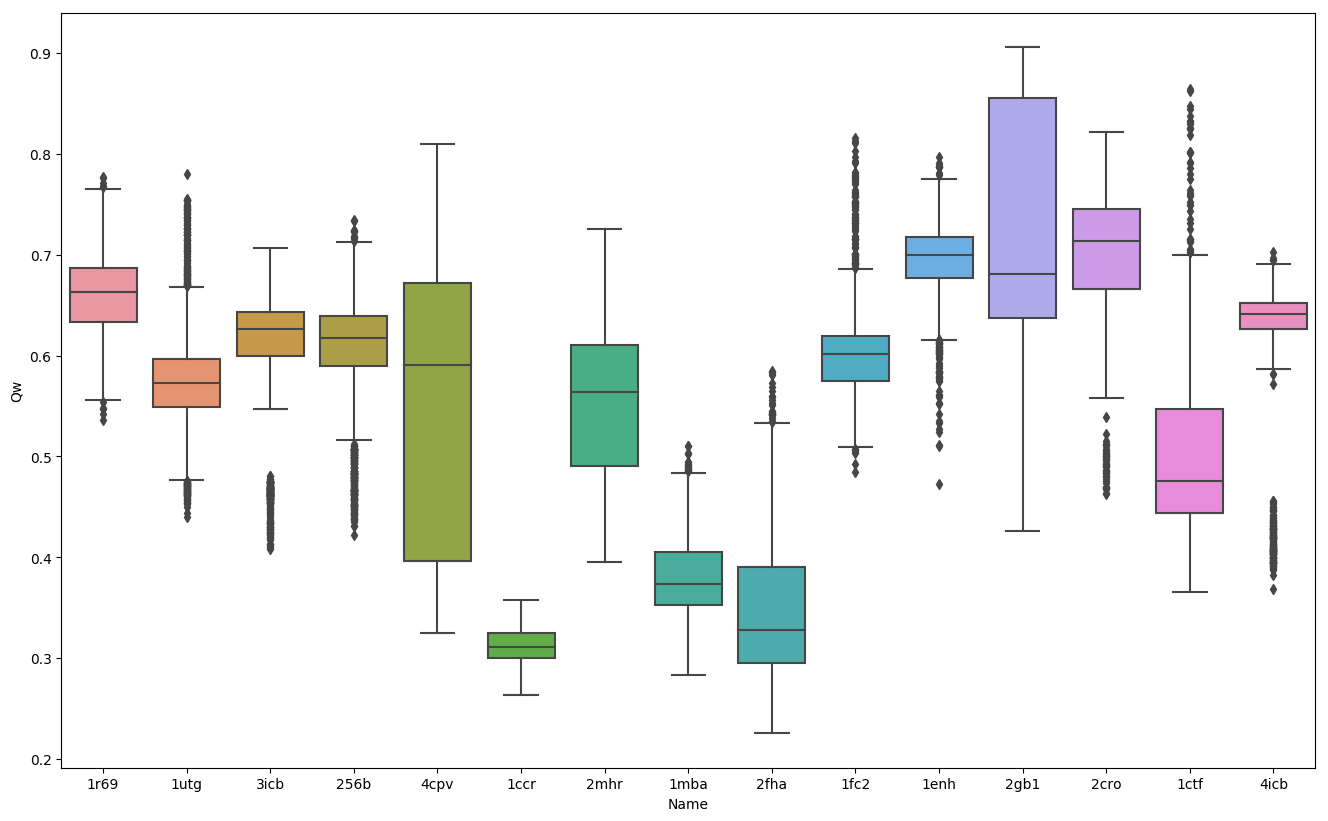

In [90]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_80_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

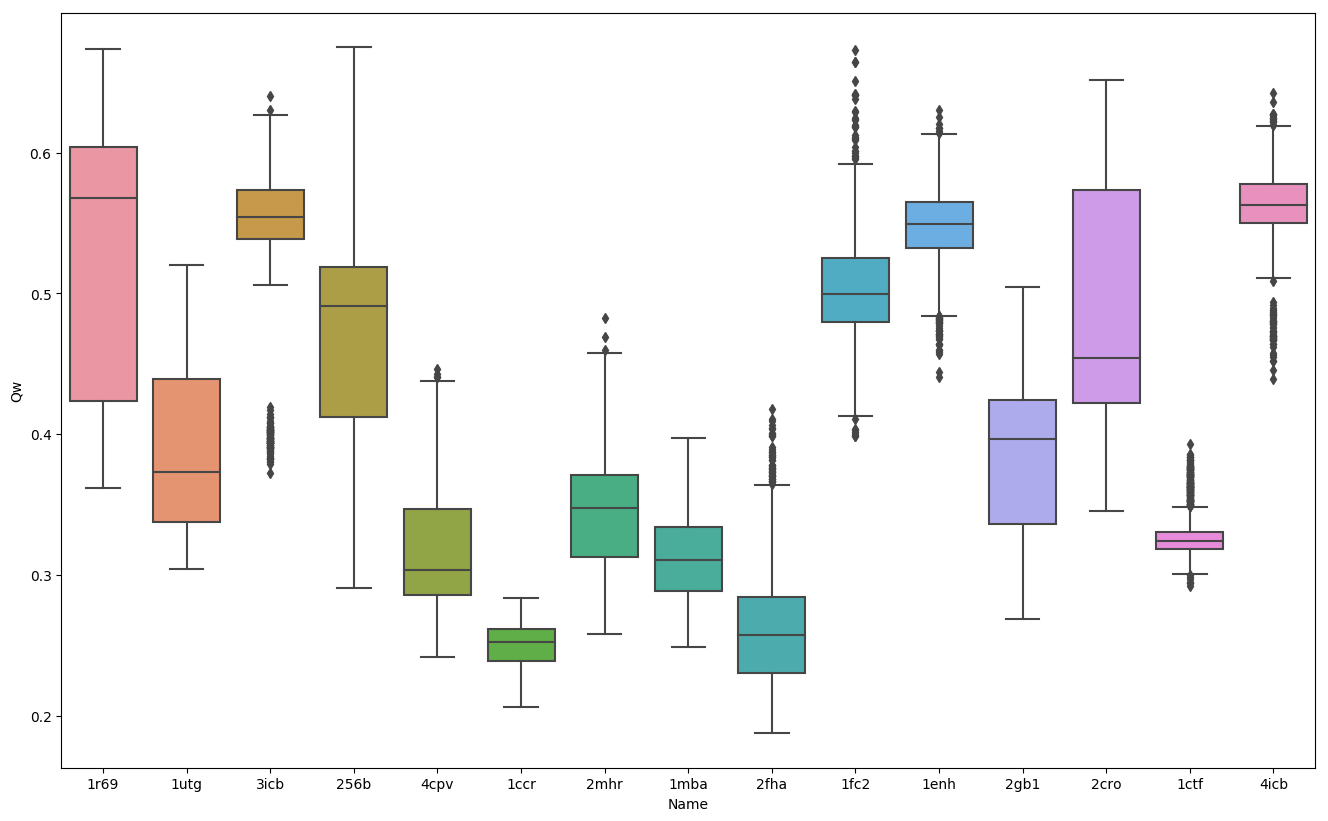

In [98]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_80_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

In [86]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_30_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

KeyboardInterrupt: 

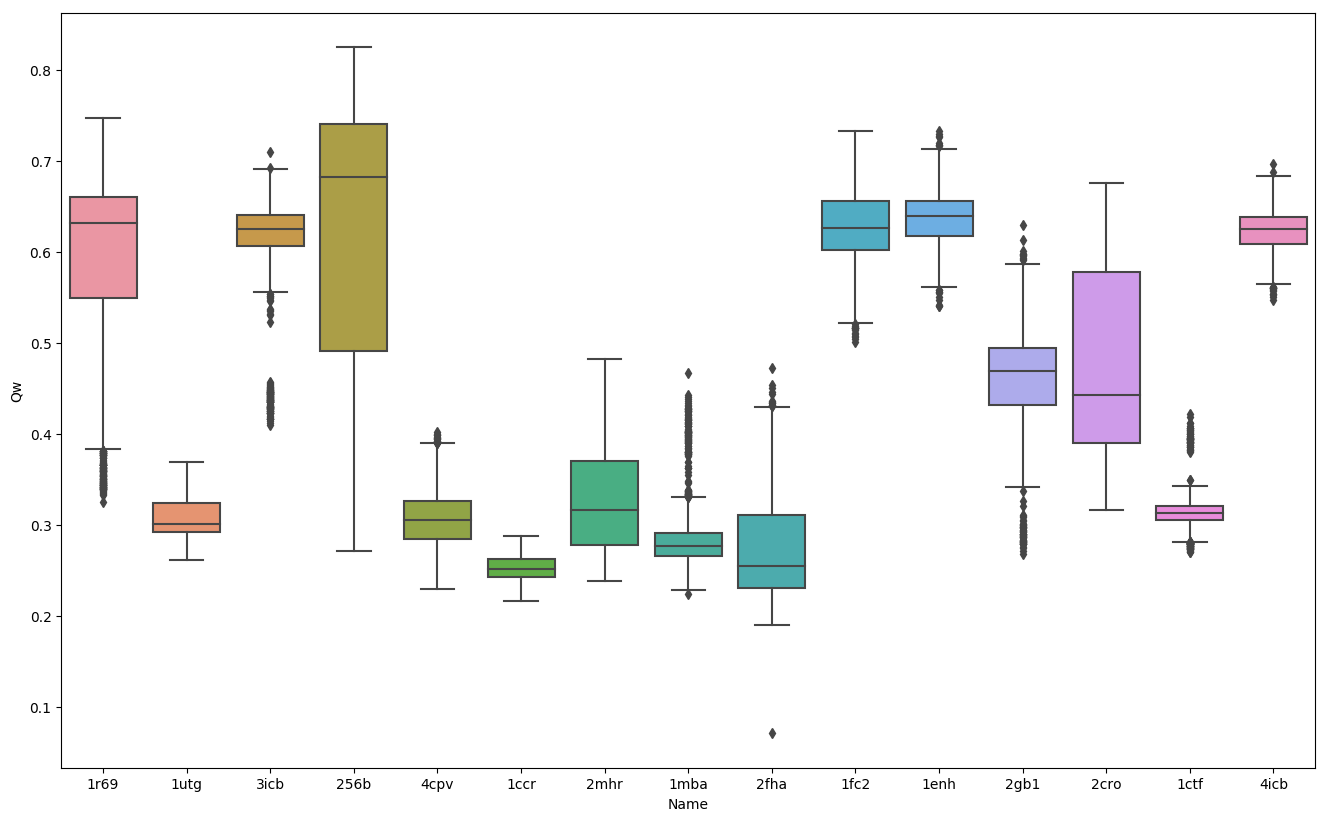

In [69]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_30_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

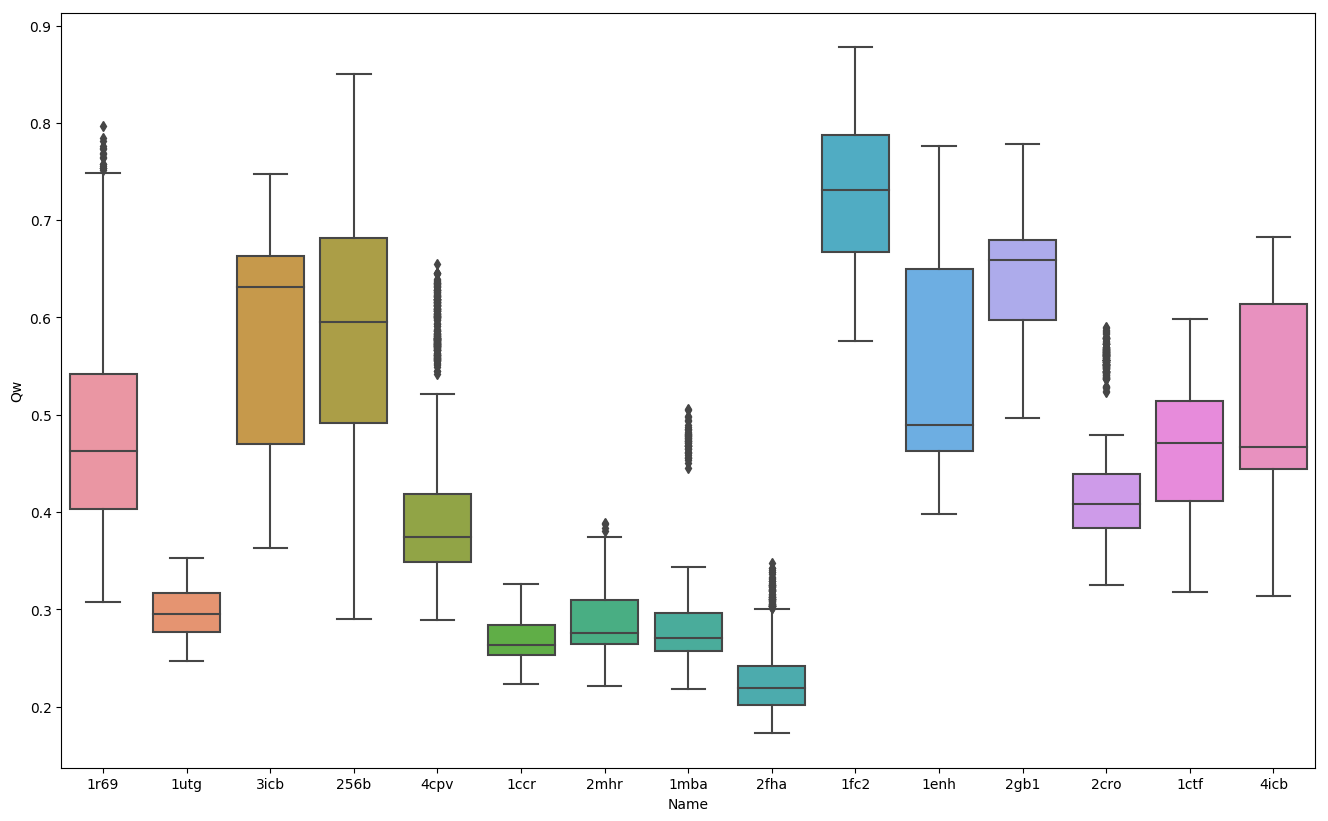

In [70]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_80_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

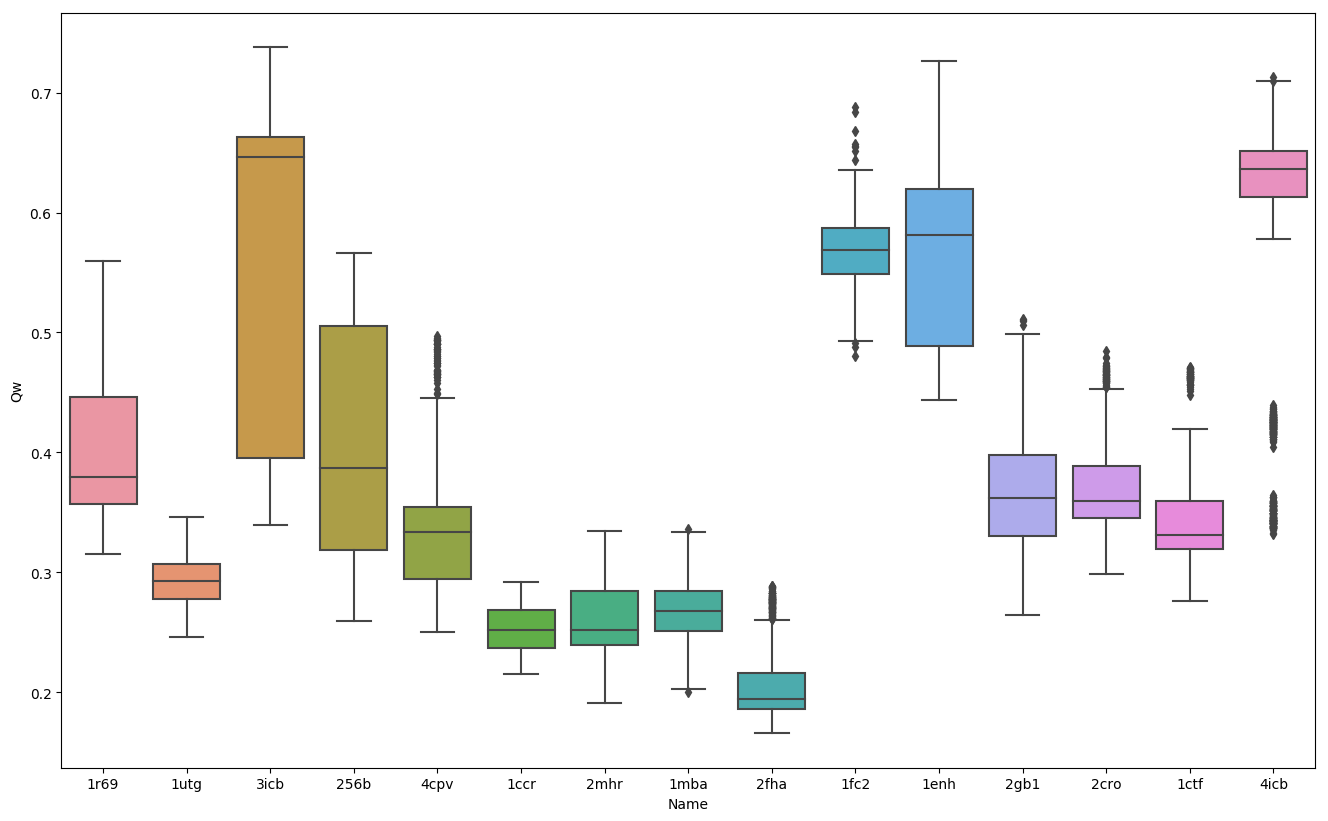

In [71]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_80_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

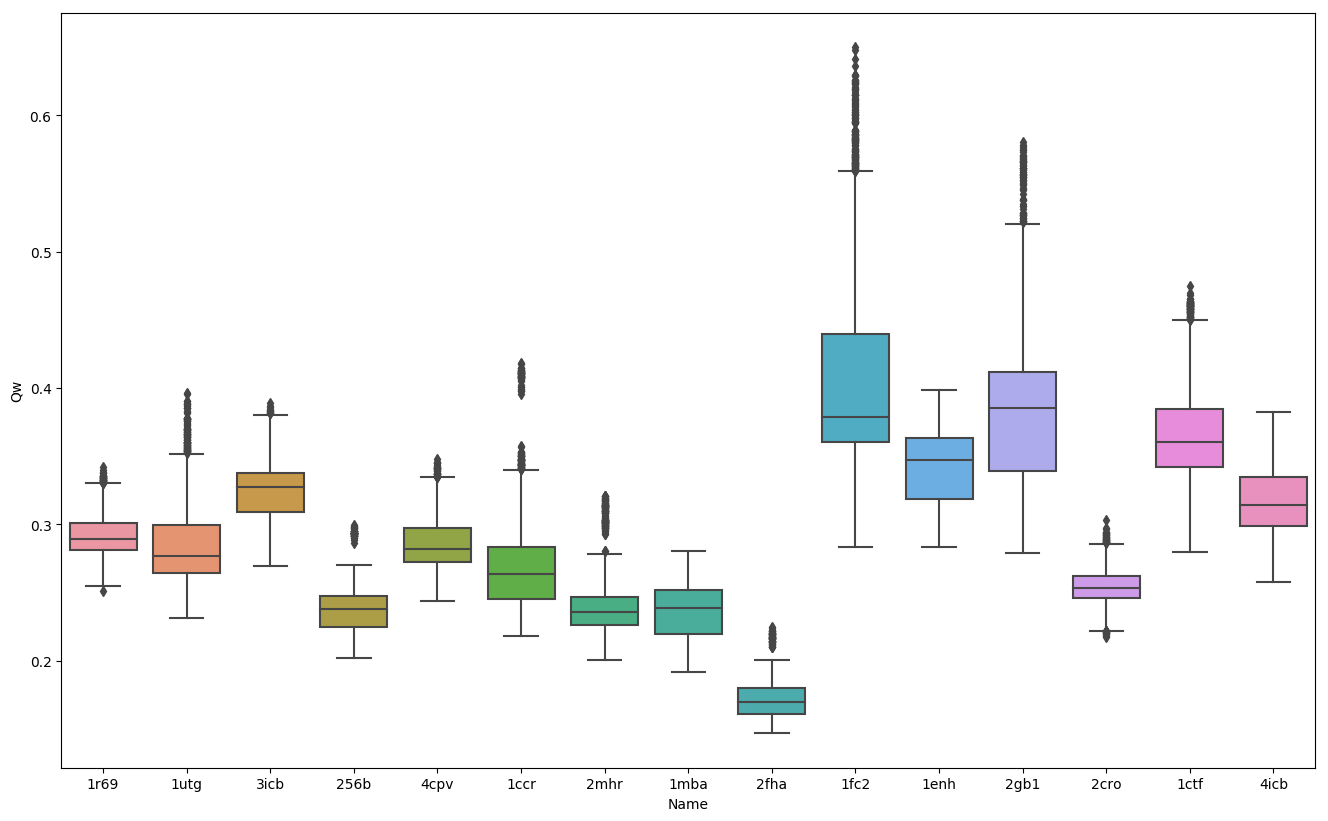

In [62]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_30_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

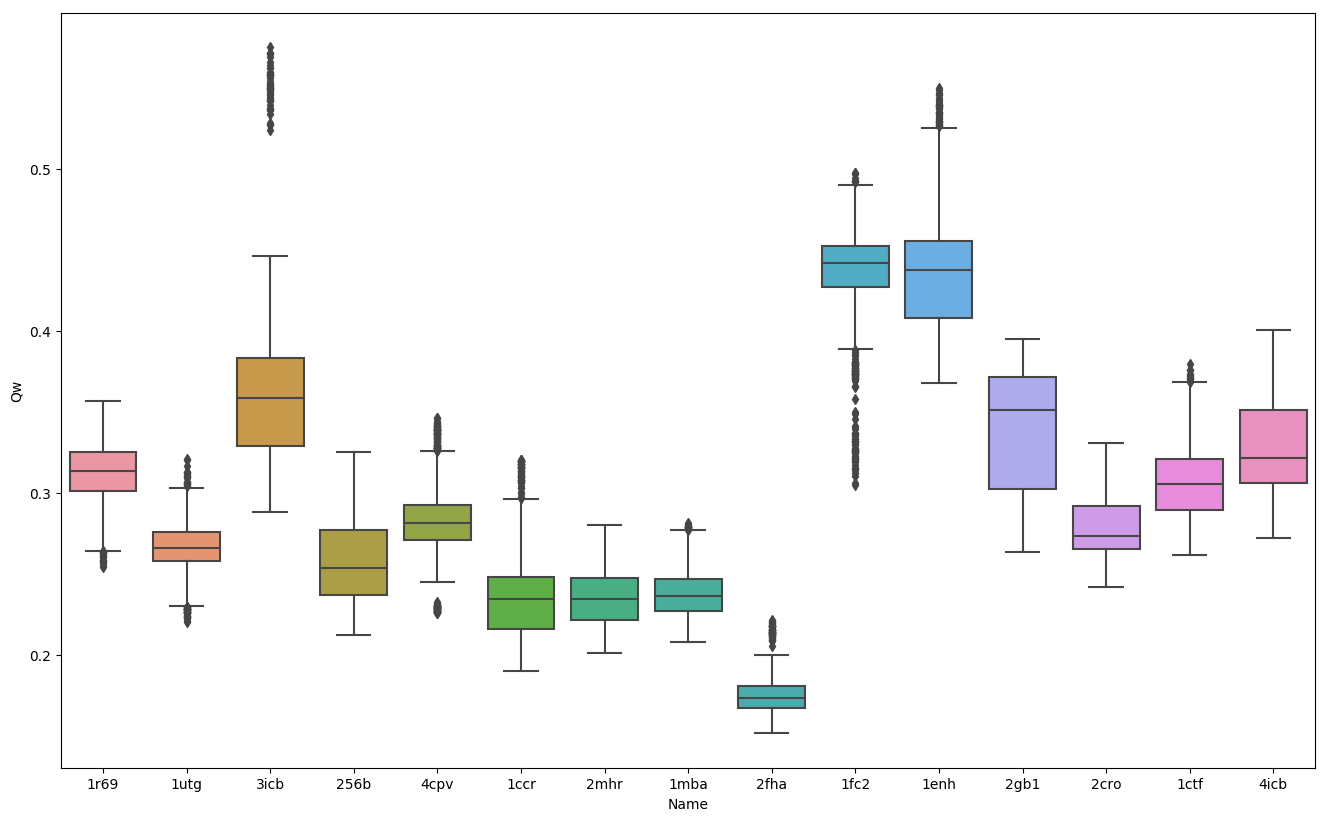

In [63]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_30_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

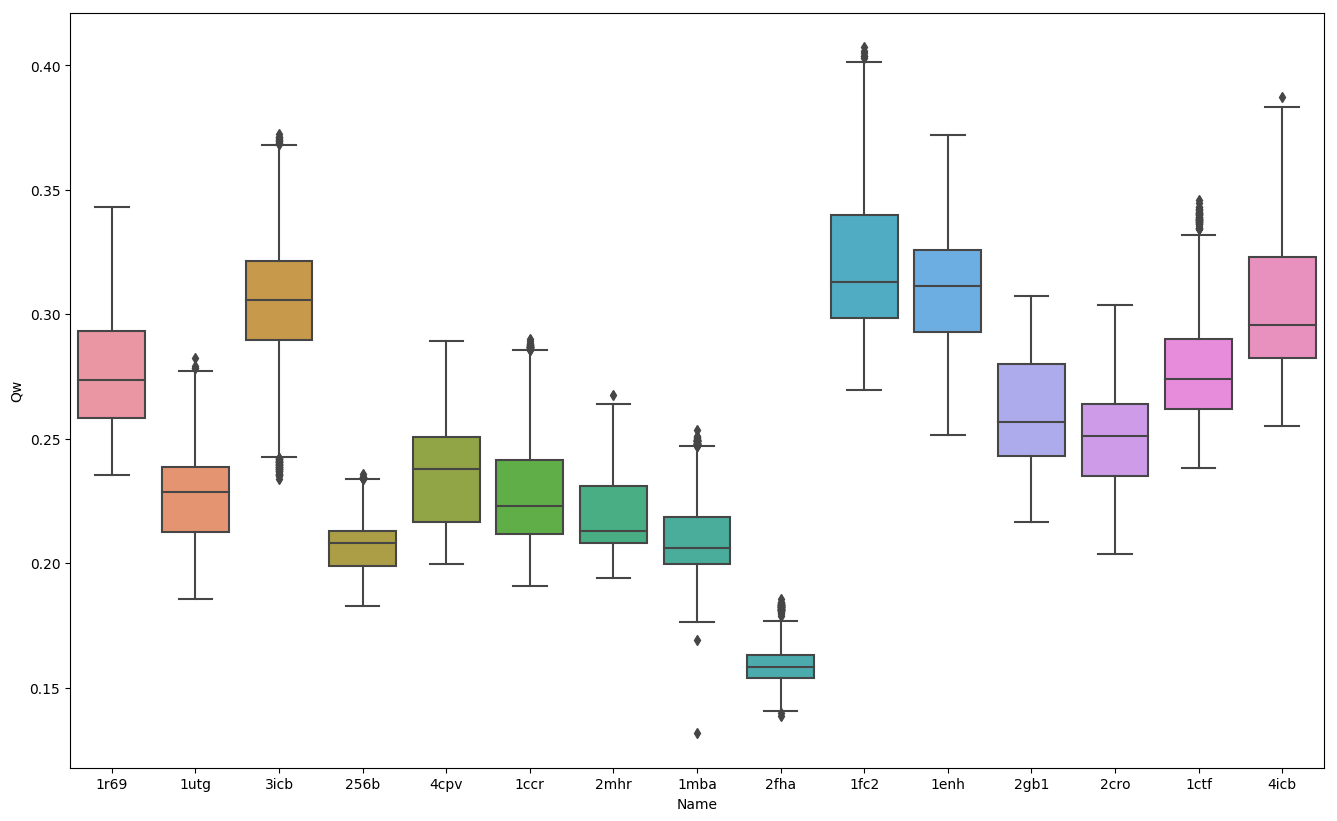

In [64]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_80_correct_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

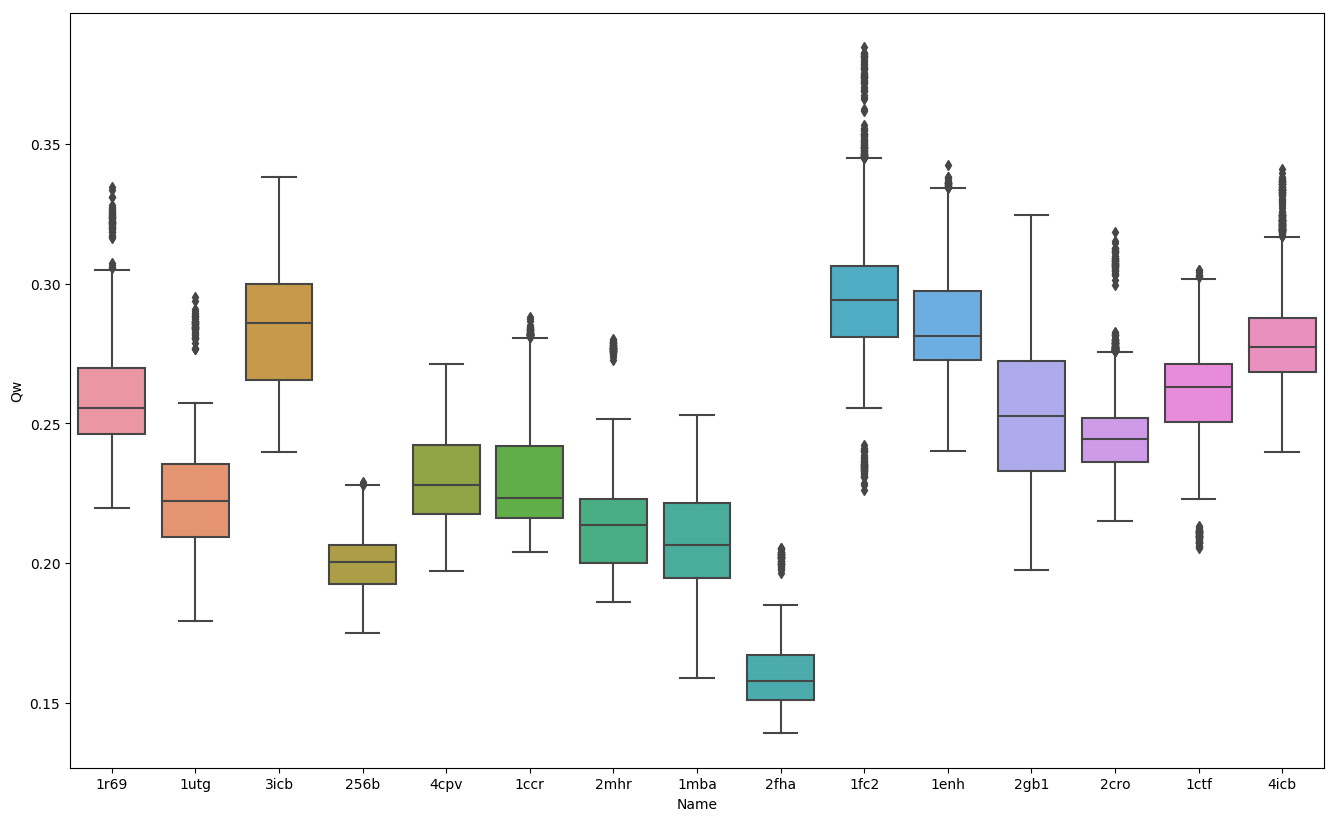

In [65]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_80_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

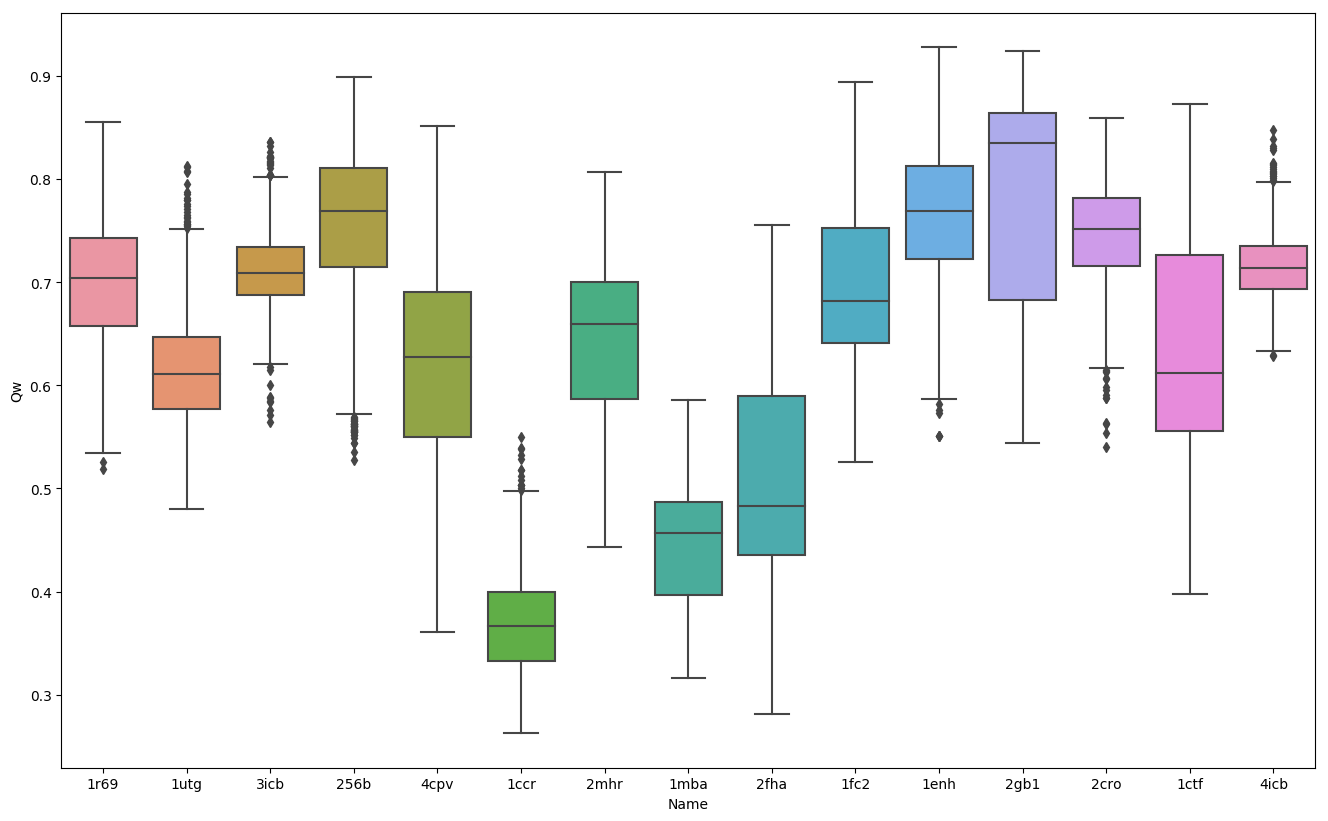

In [55]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_90"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

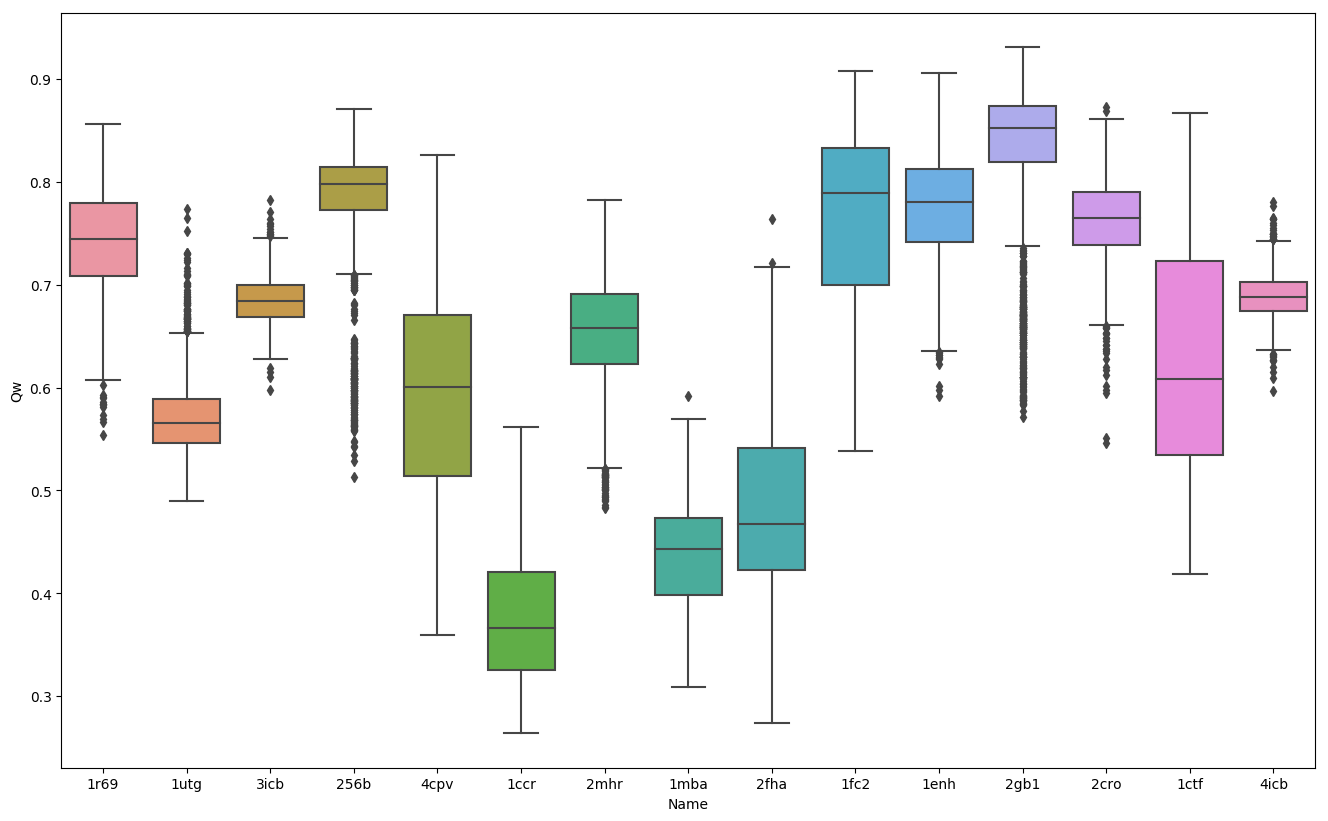

In [53]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_30"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

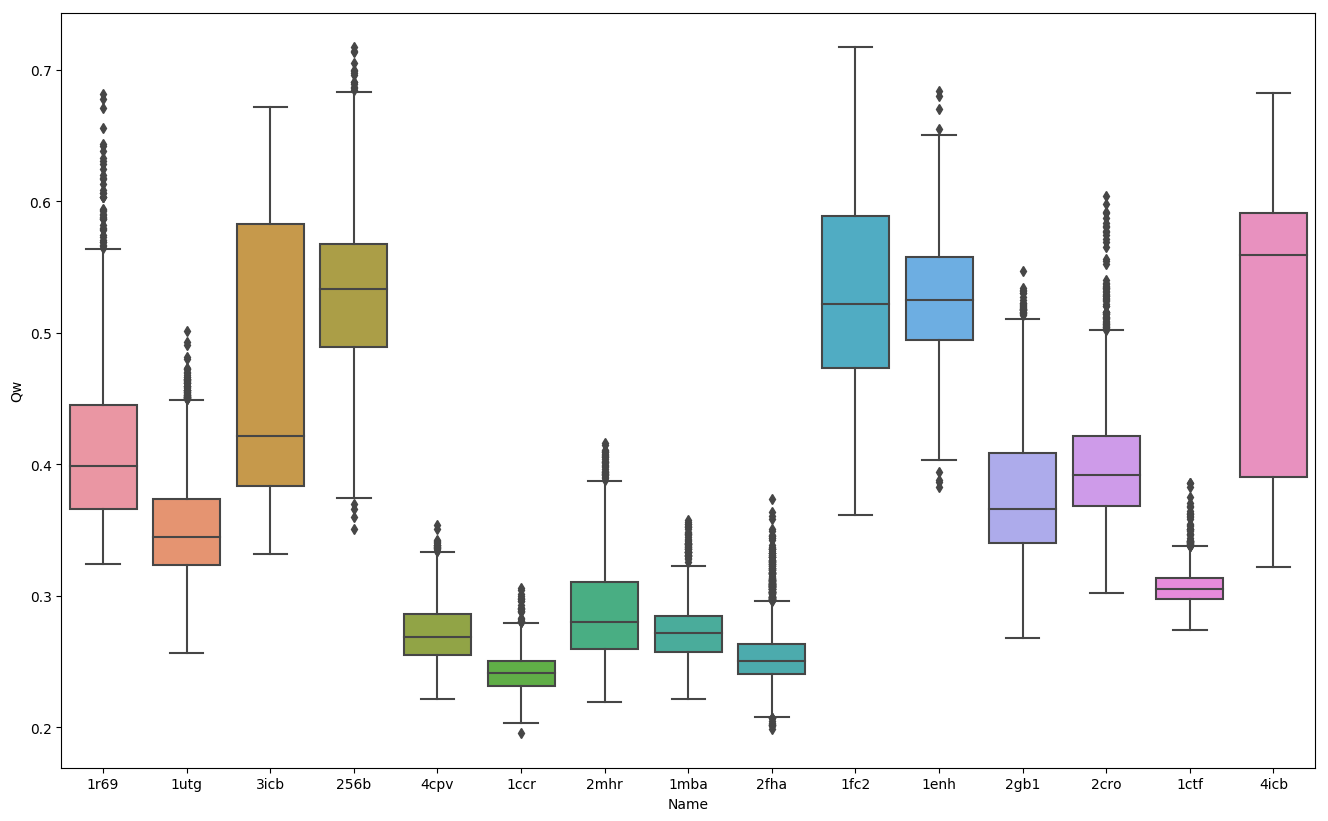

In [50]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_90_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

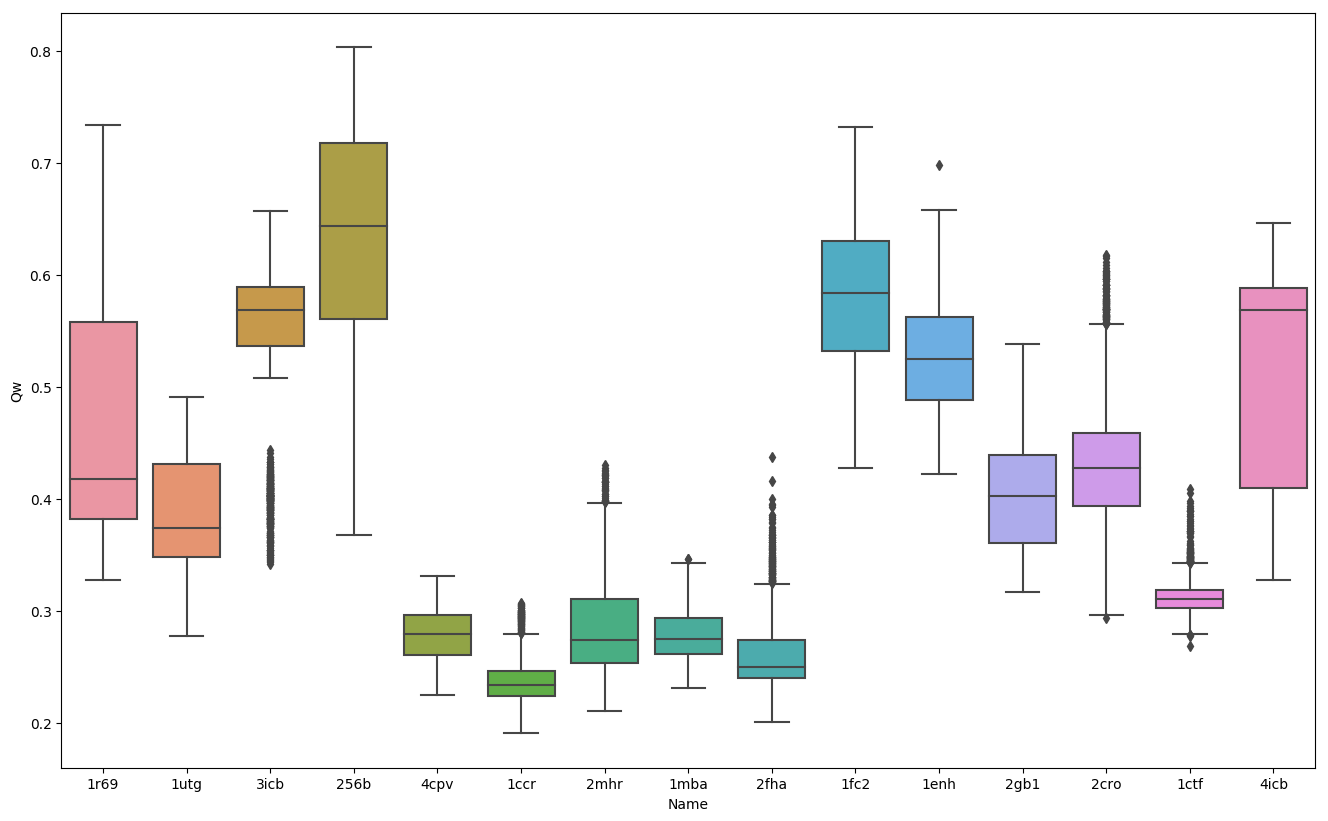

In [47]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter3_30_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

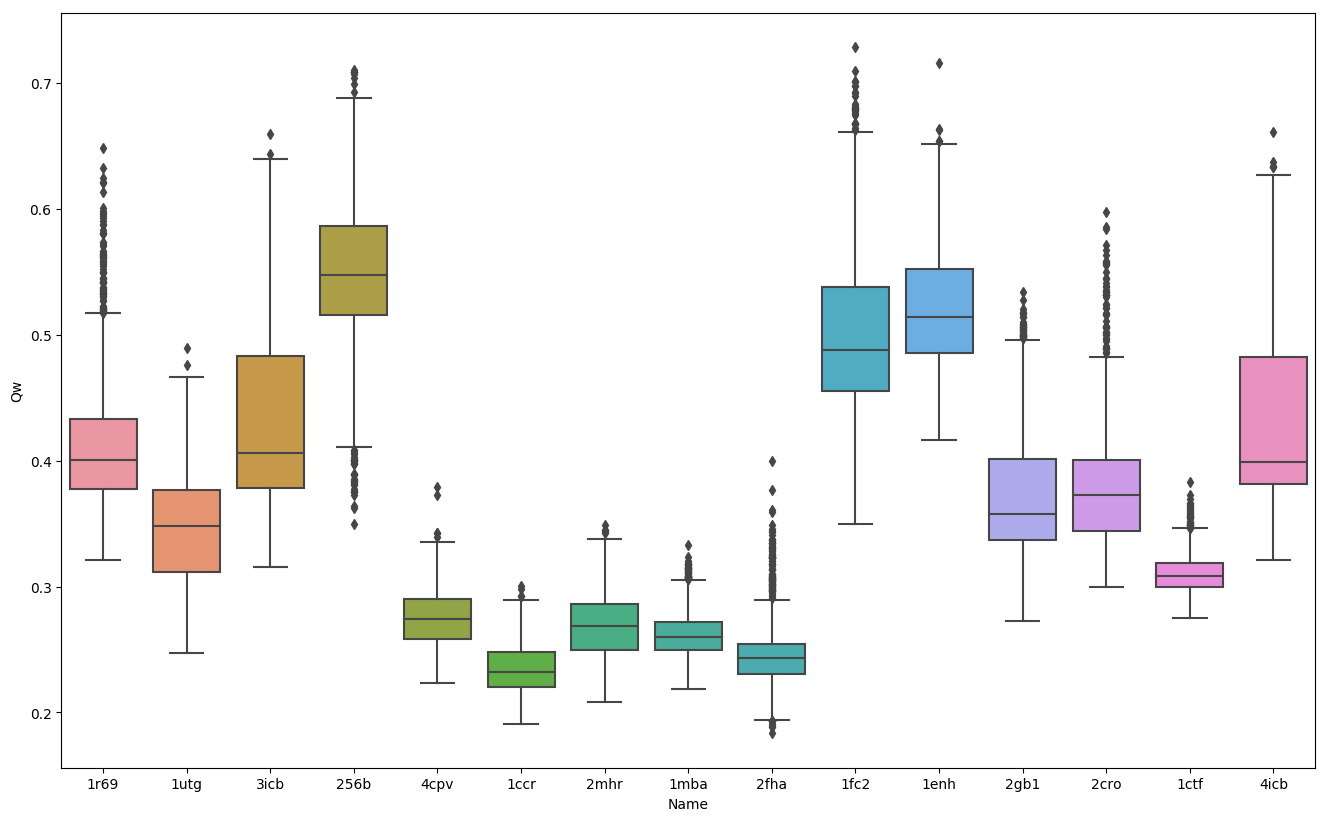

In [42]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_90_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

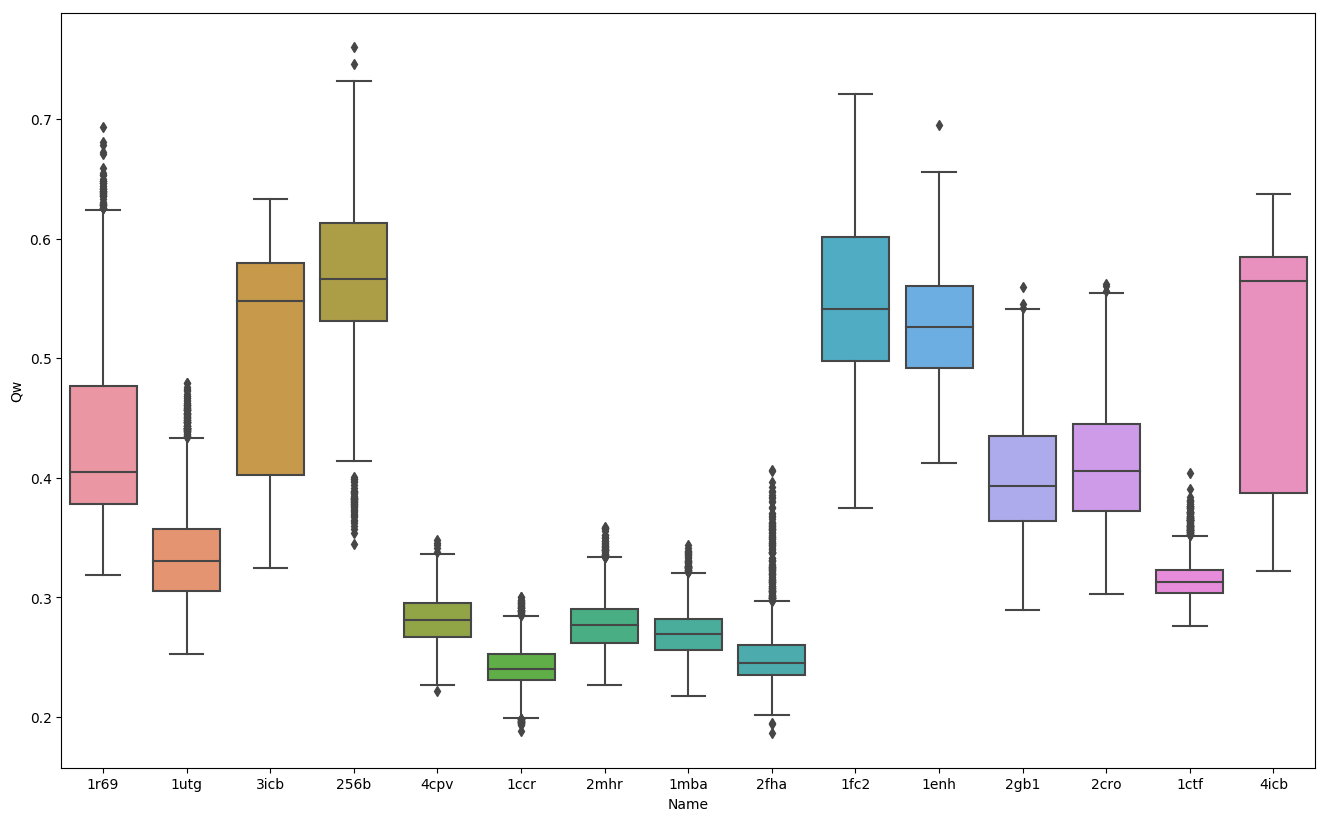

In [40]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_30_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

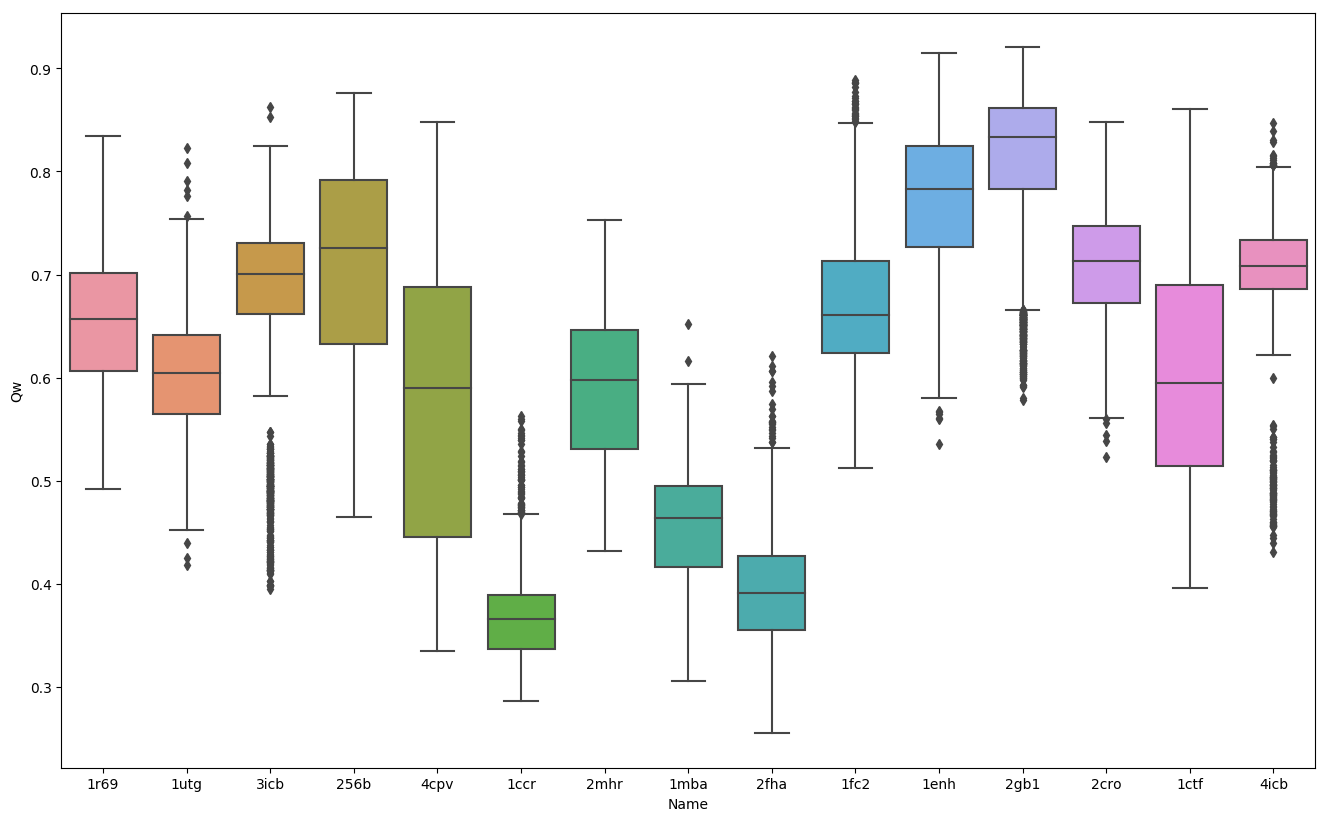

In [36]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_90"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

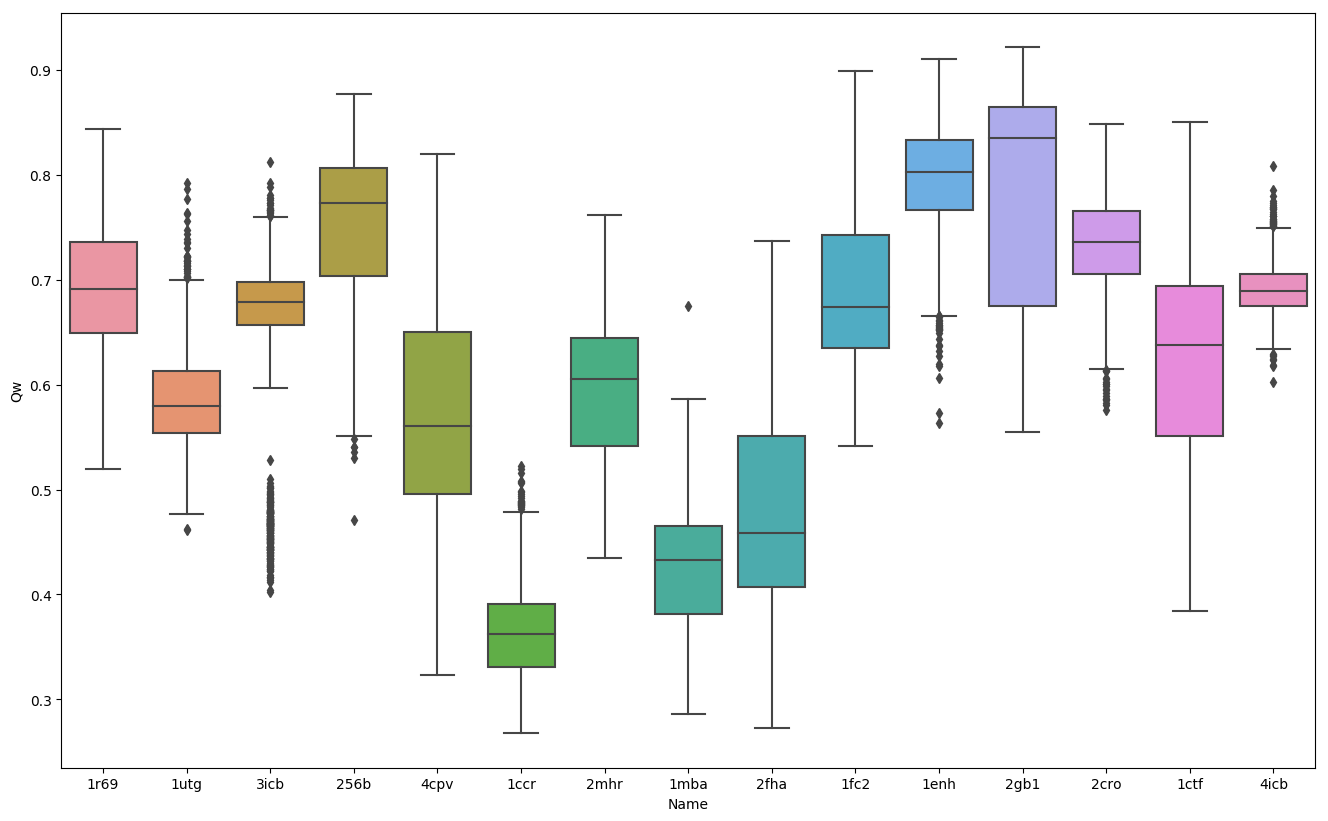

In [34]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter2_30"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

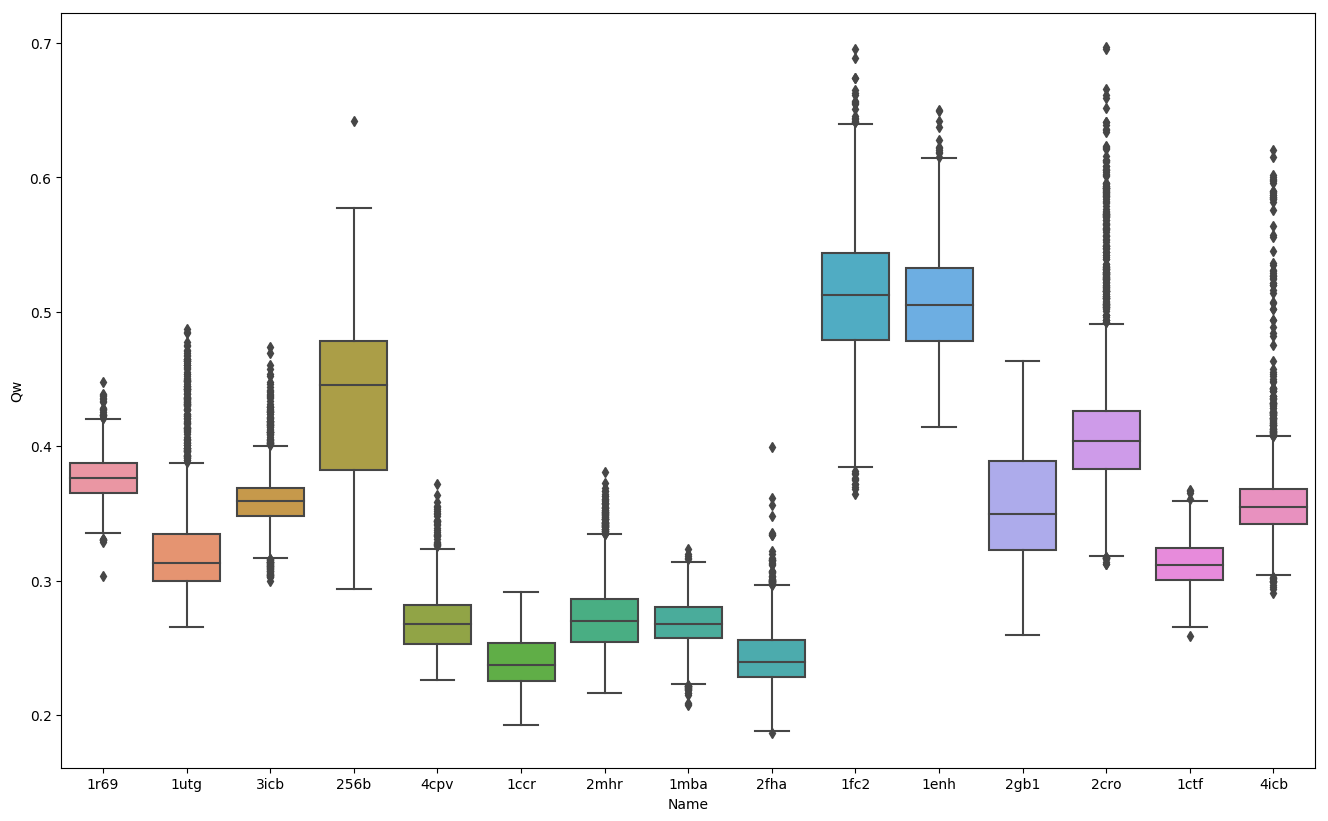

In [26]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_90_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

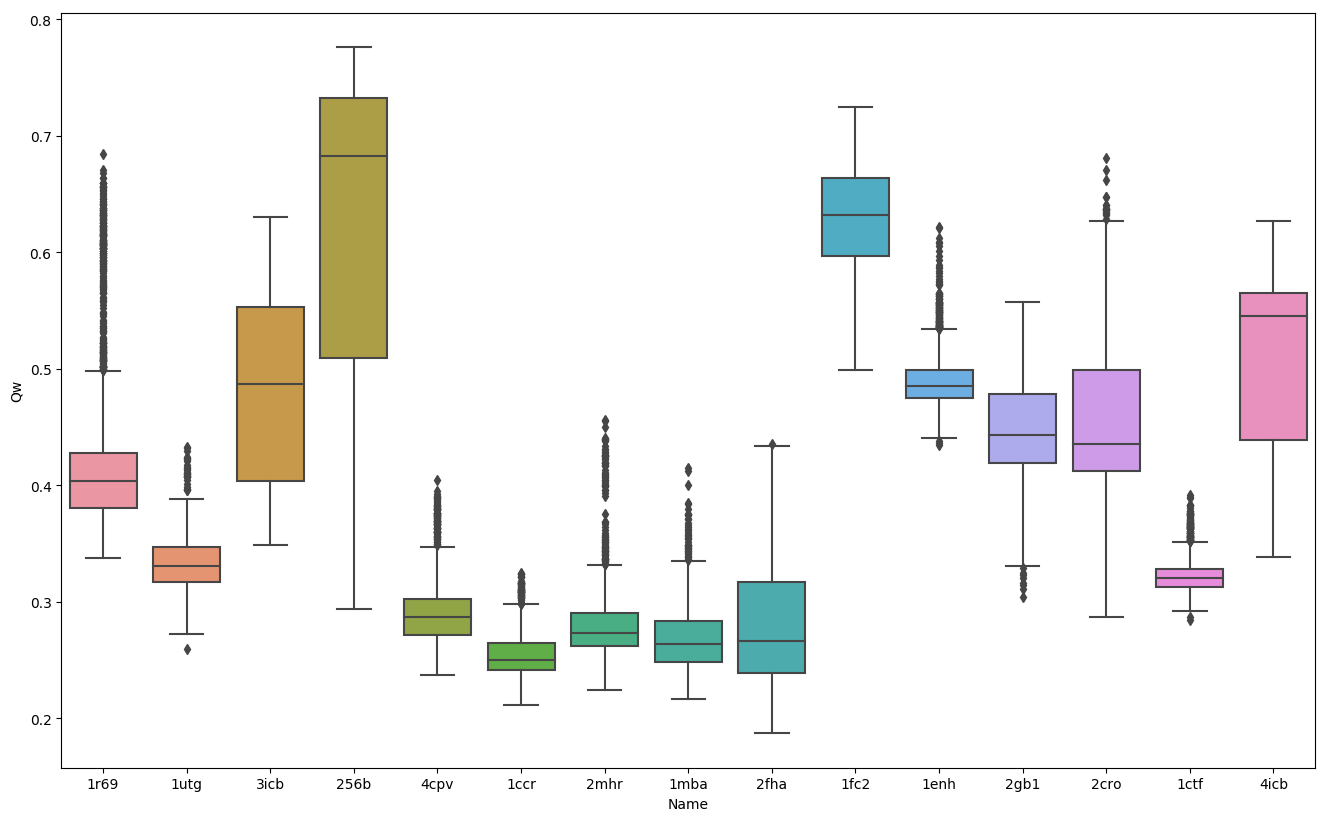

In [23]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_10_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

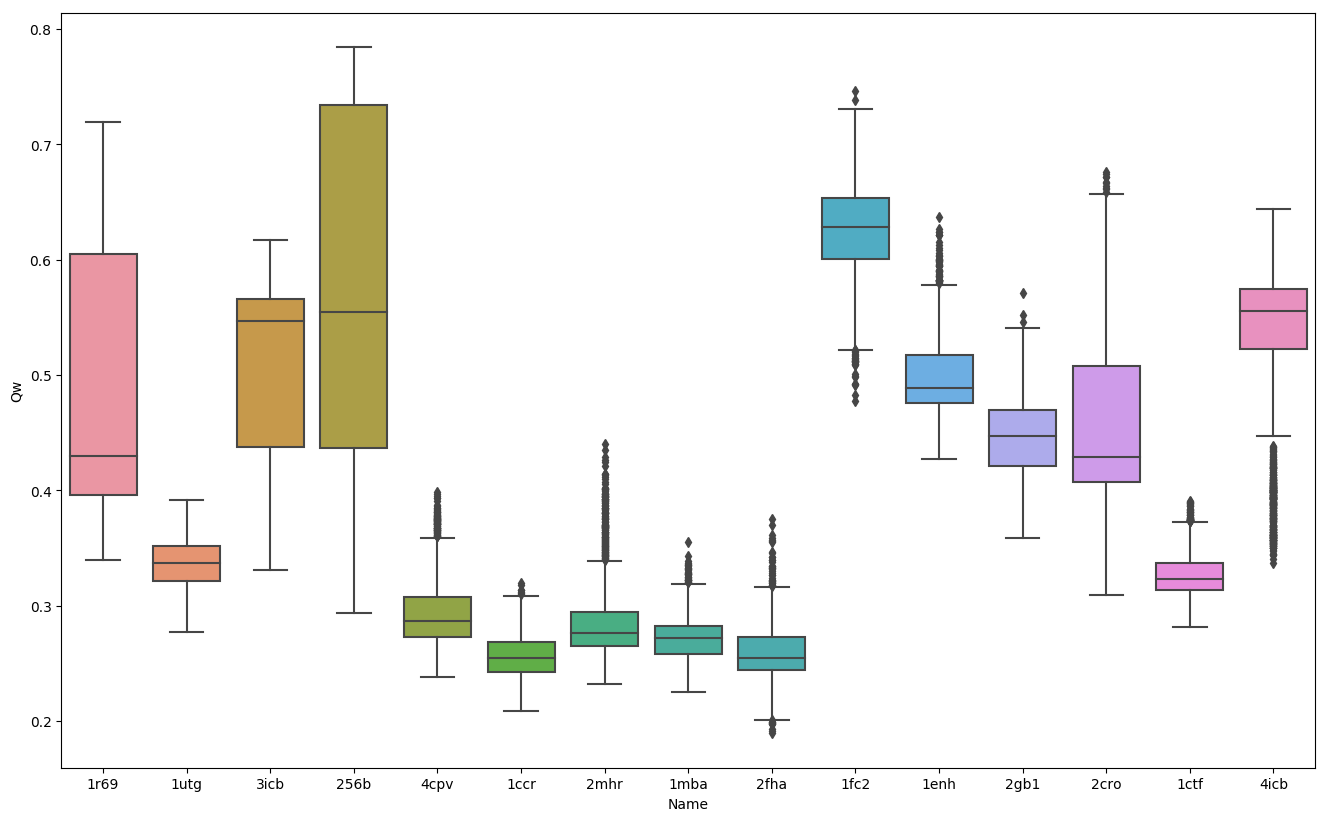

In [20]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_30_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

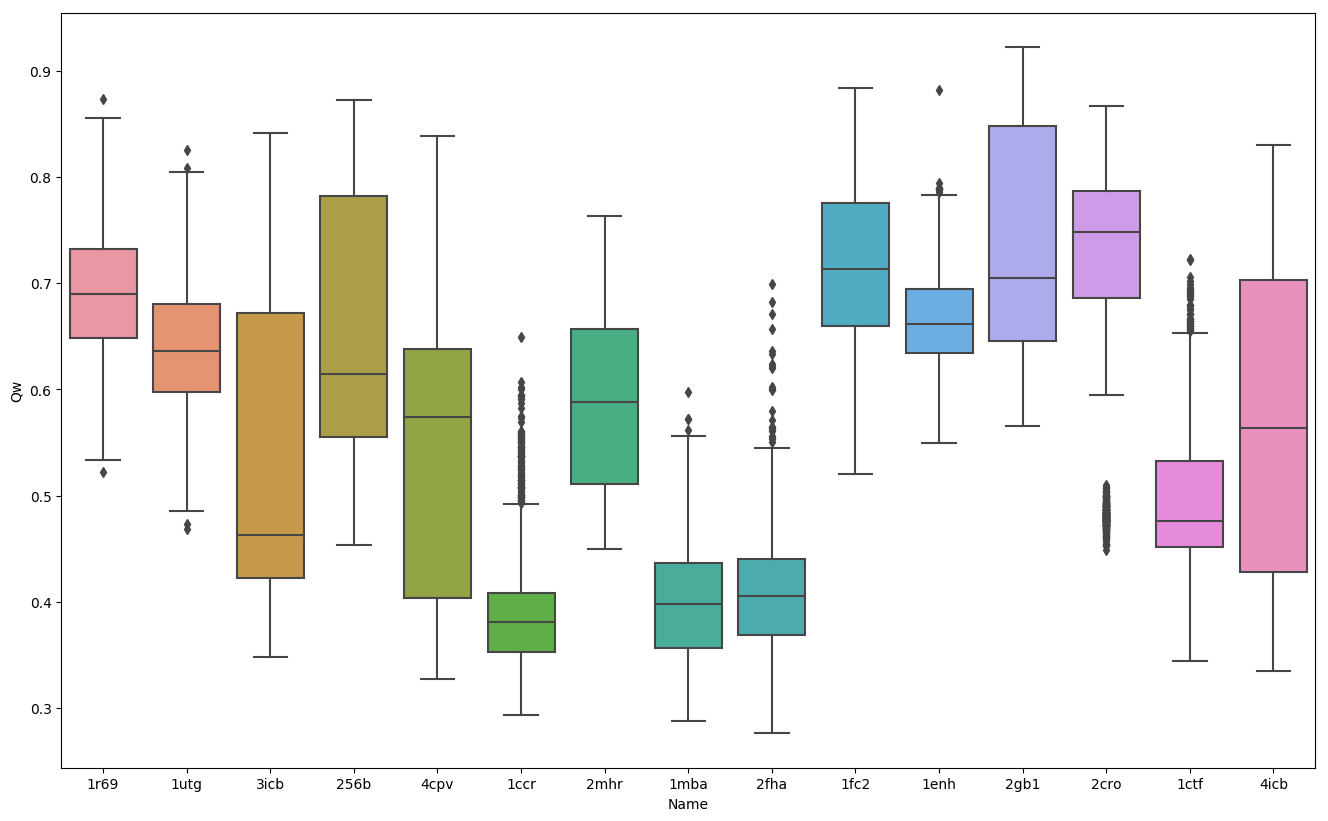

In [12]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_90"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

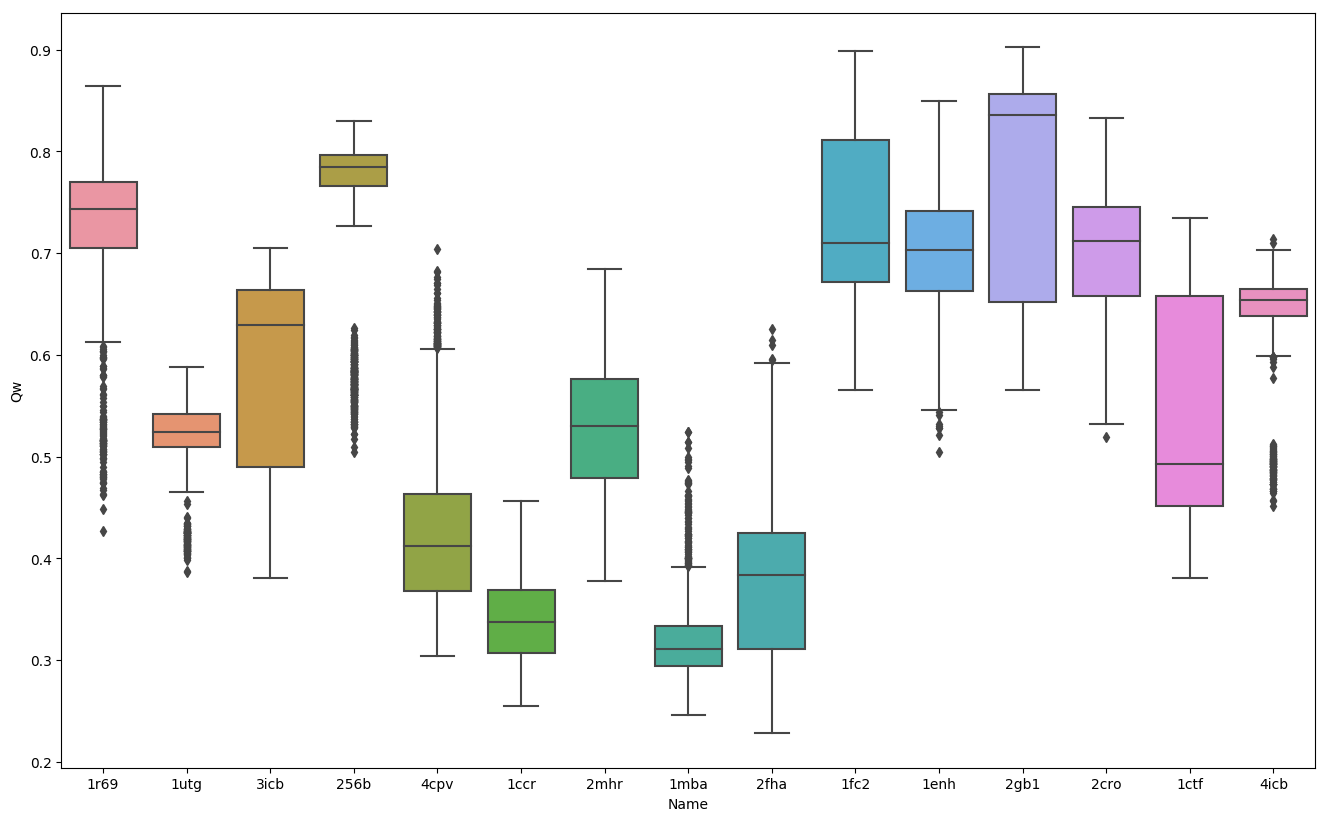

In [10]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter1_30"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

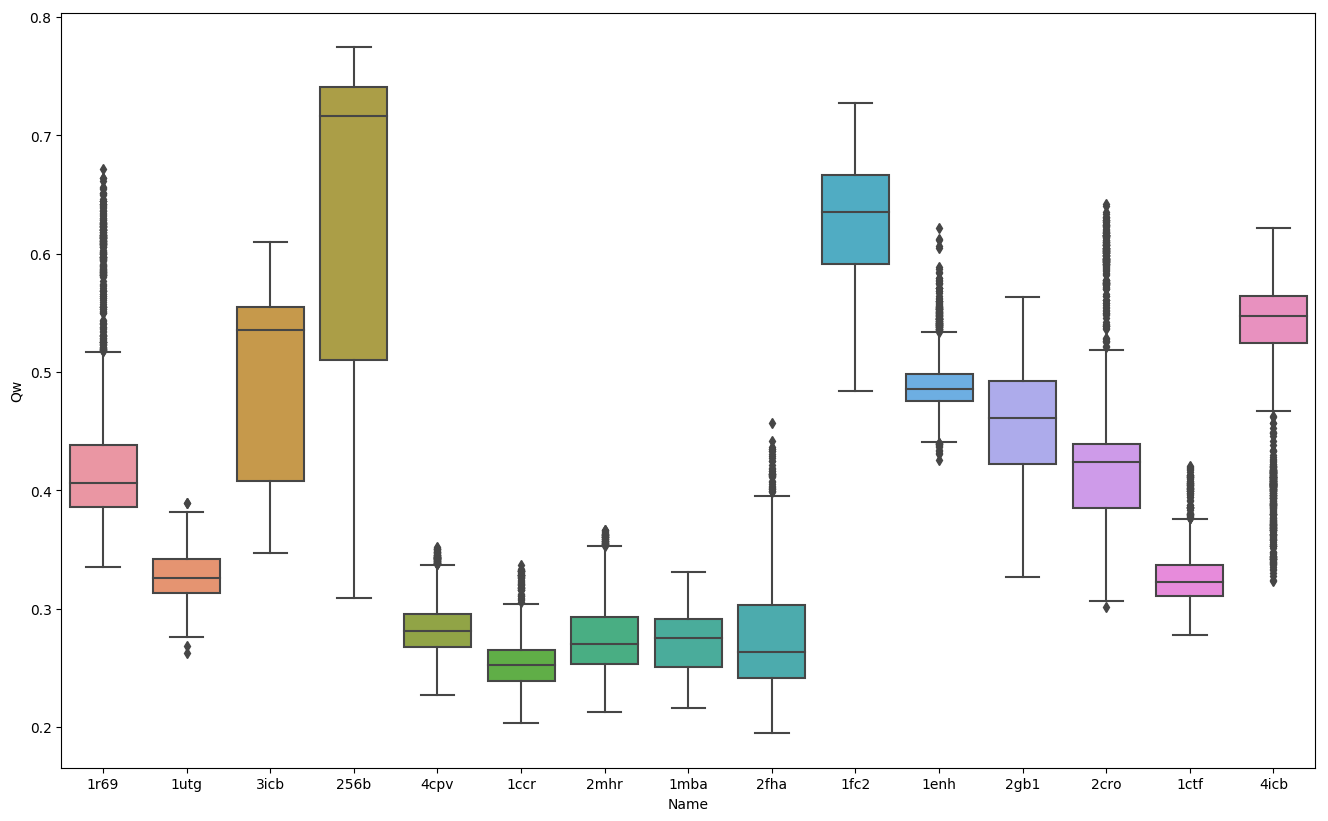

In [6]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "multi_constant_tc_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

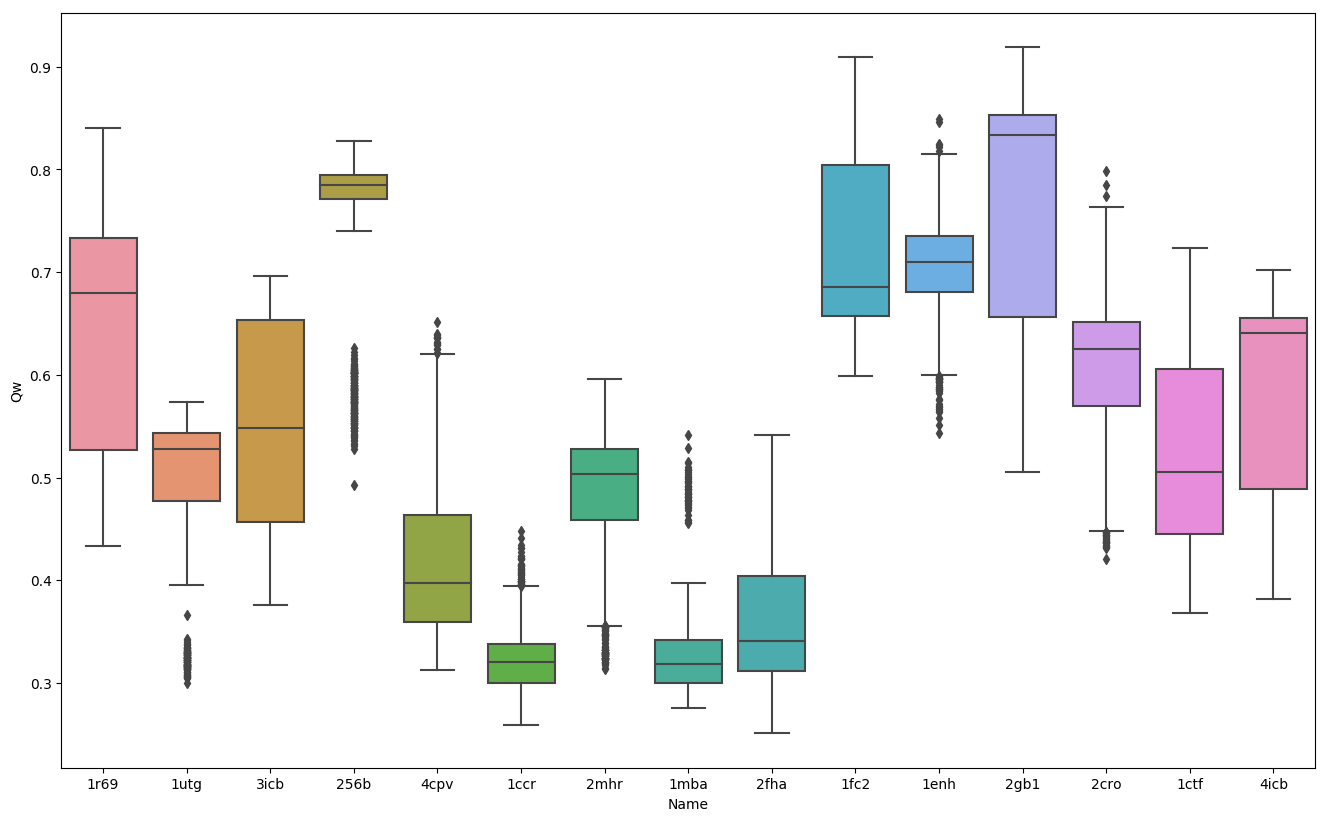

In [4]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "multi_constant_tc"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

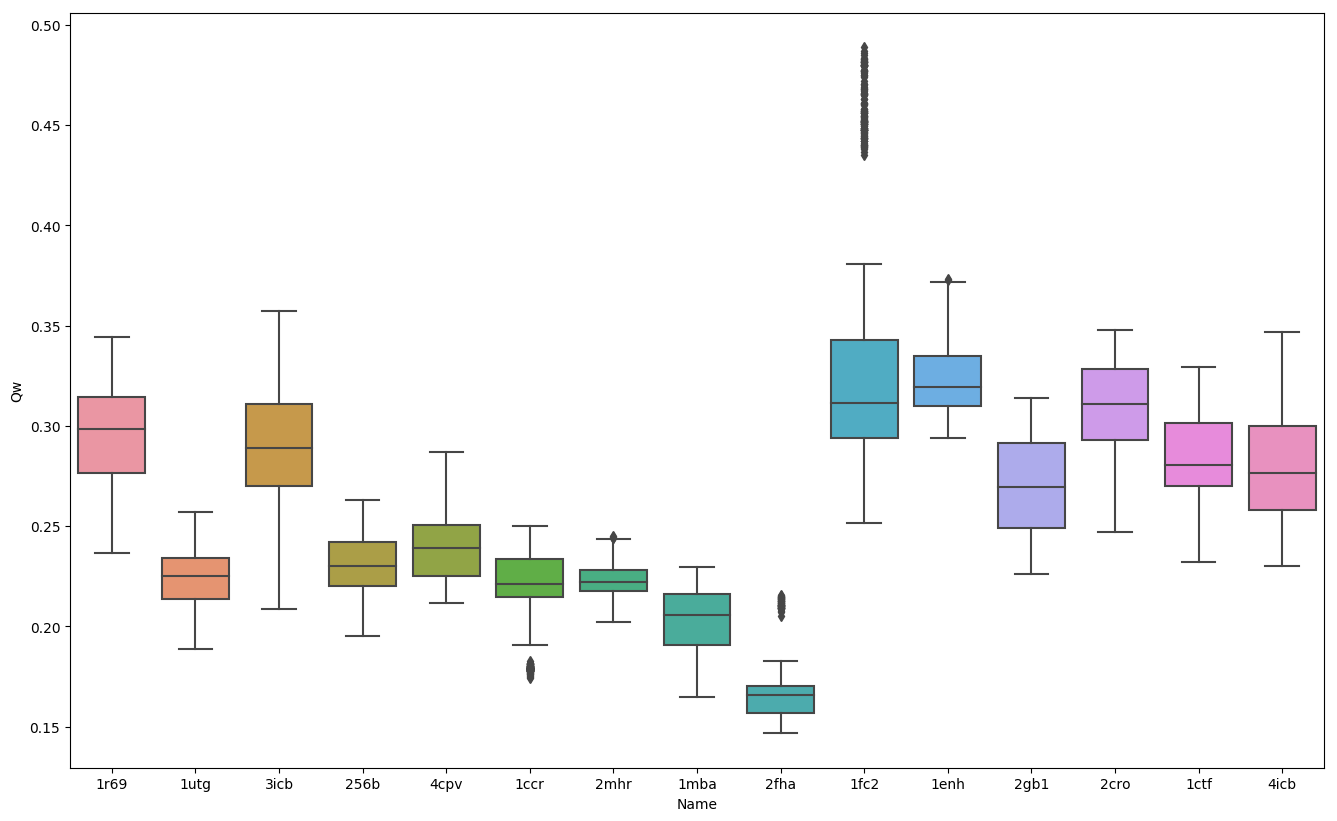

In [30]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "multi_iter0_A_norm"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

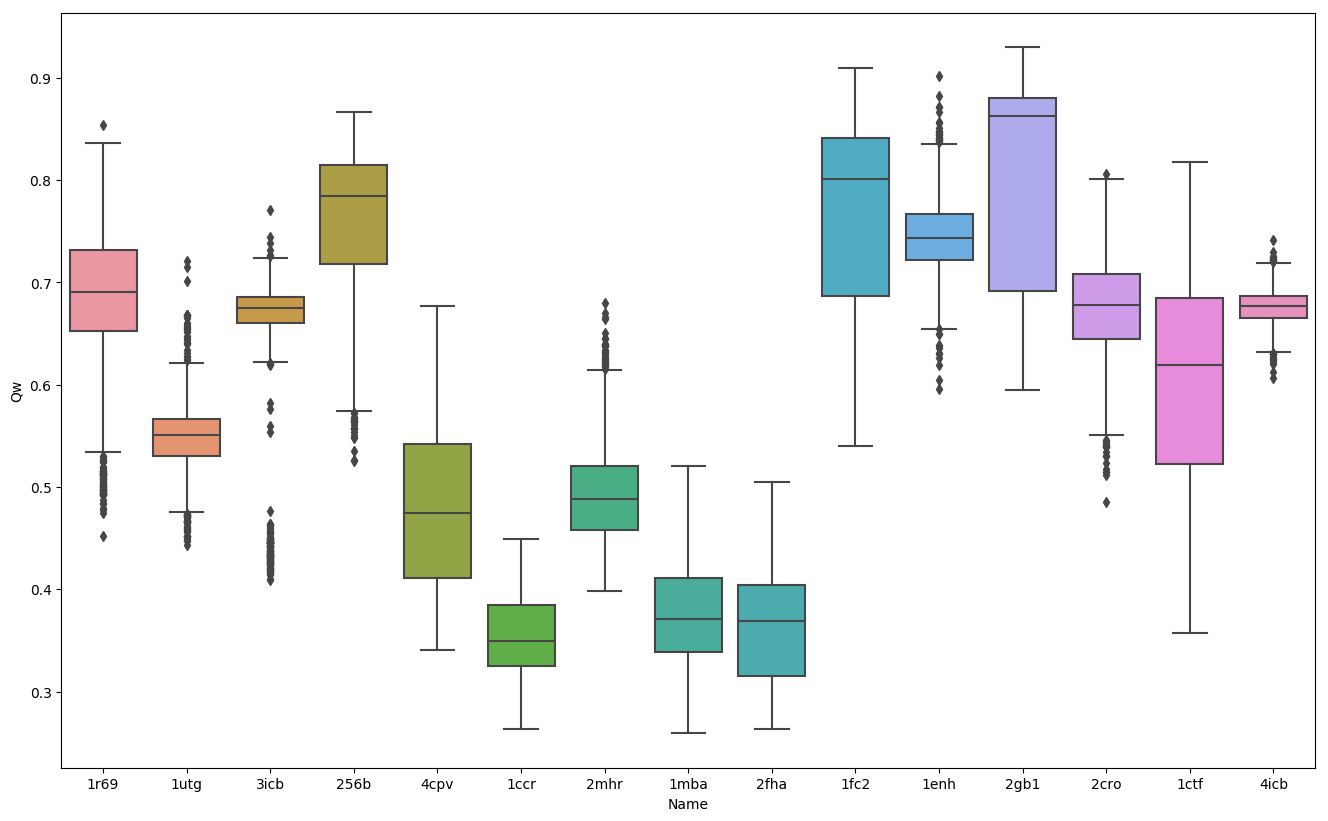

In [27]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "multi_iter0_constraint"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

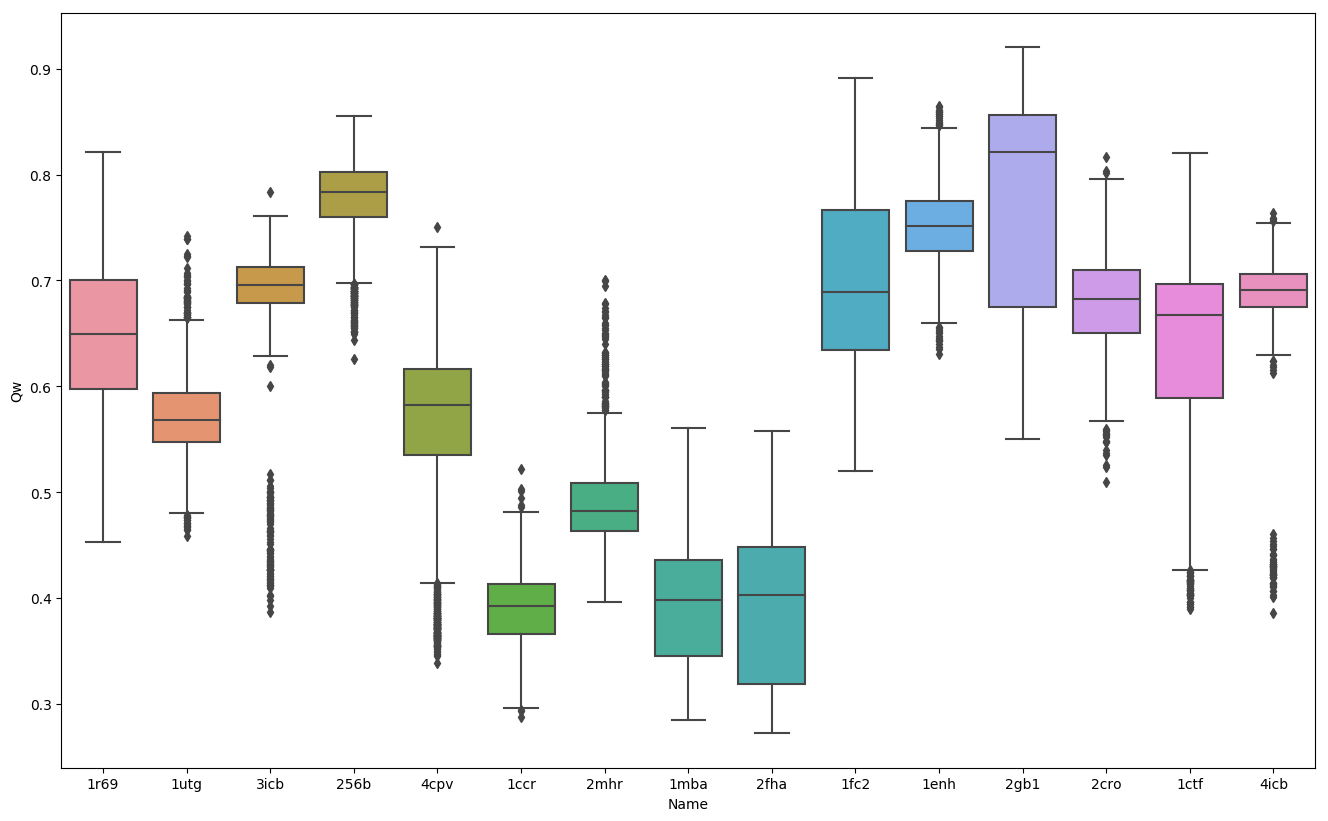

In [23]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "original_normalized"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

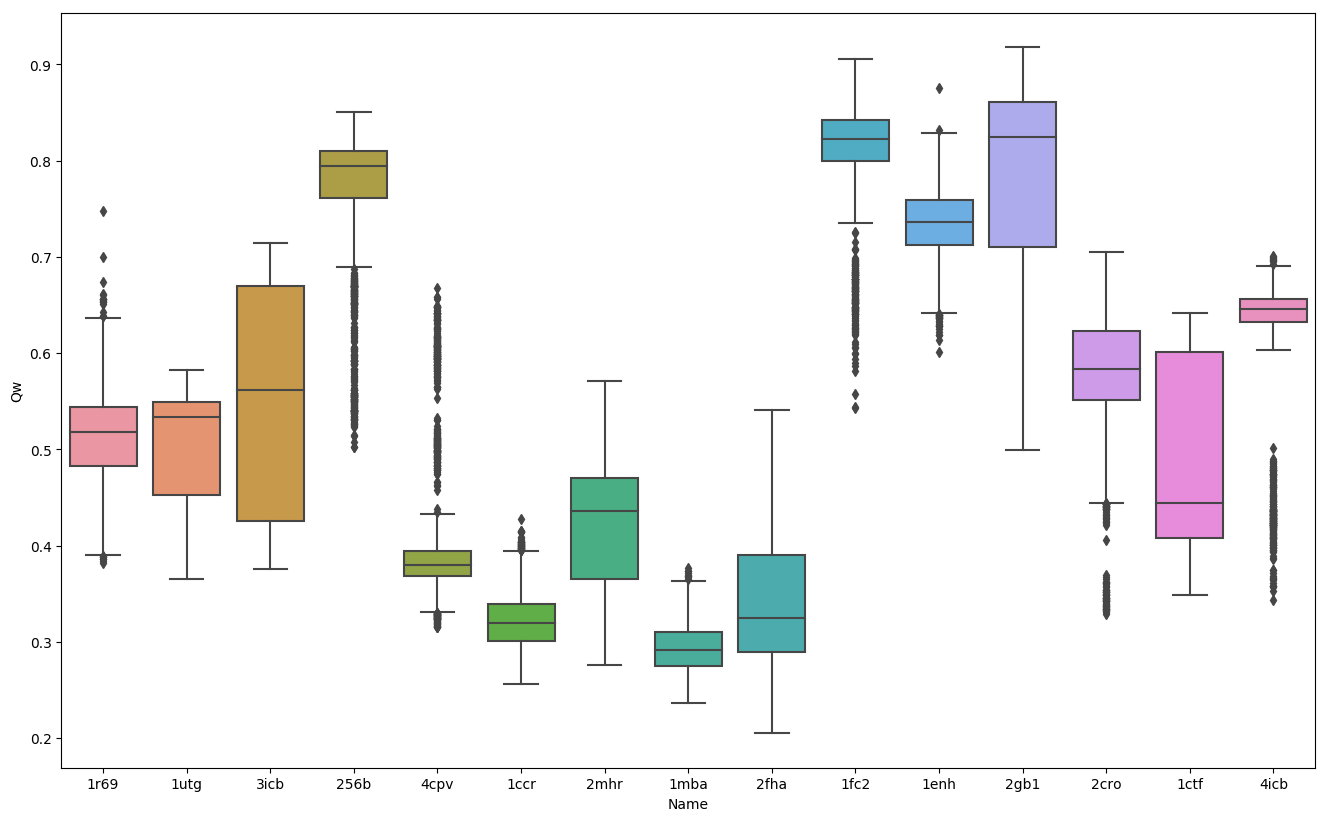

In [20]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "multi_iter0_normalized"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

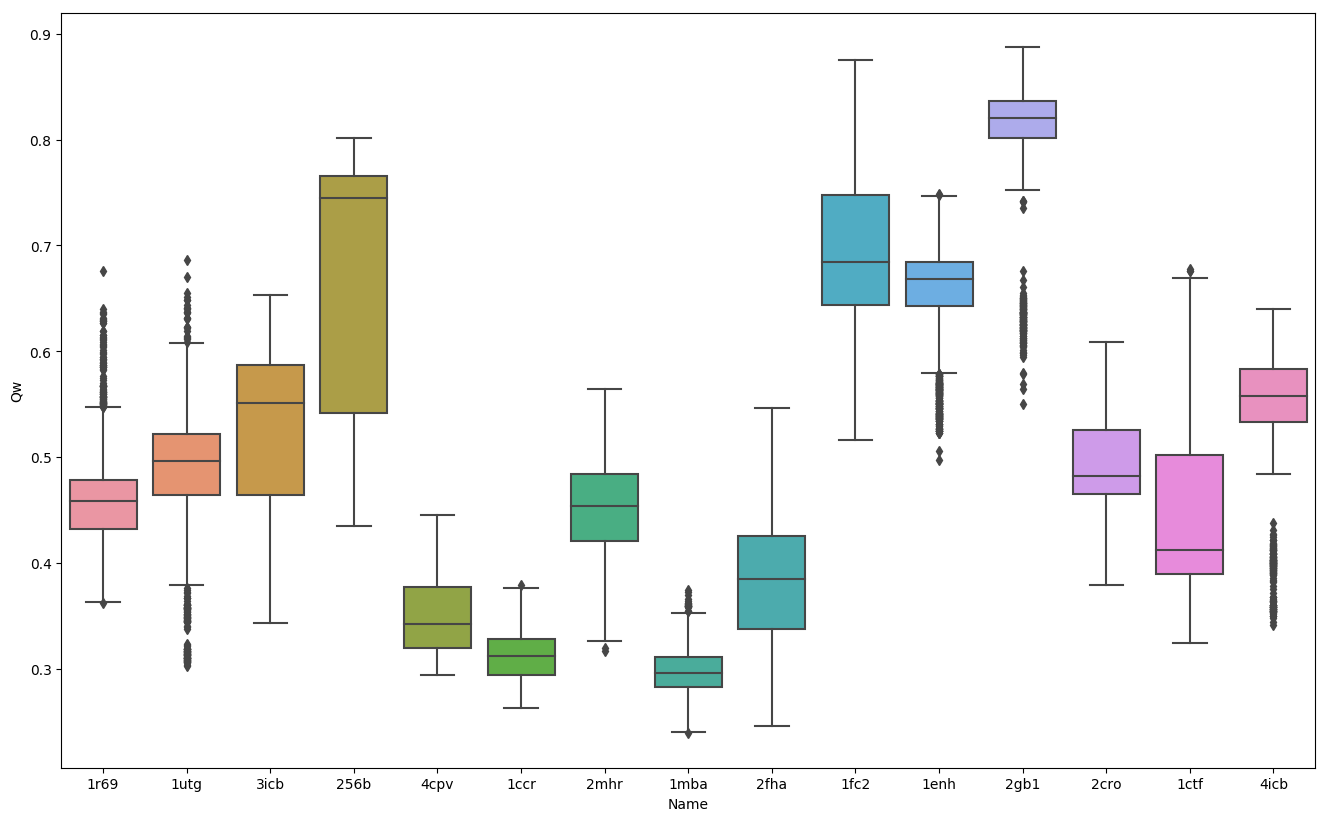

In [16]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "iter0"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

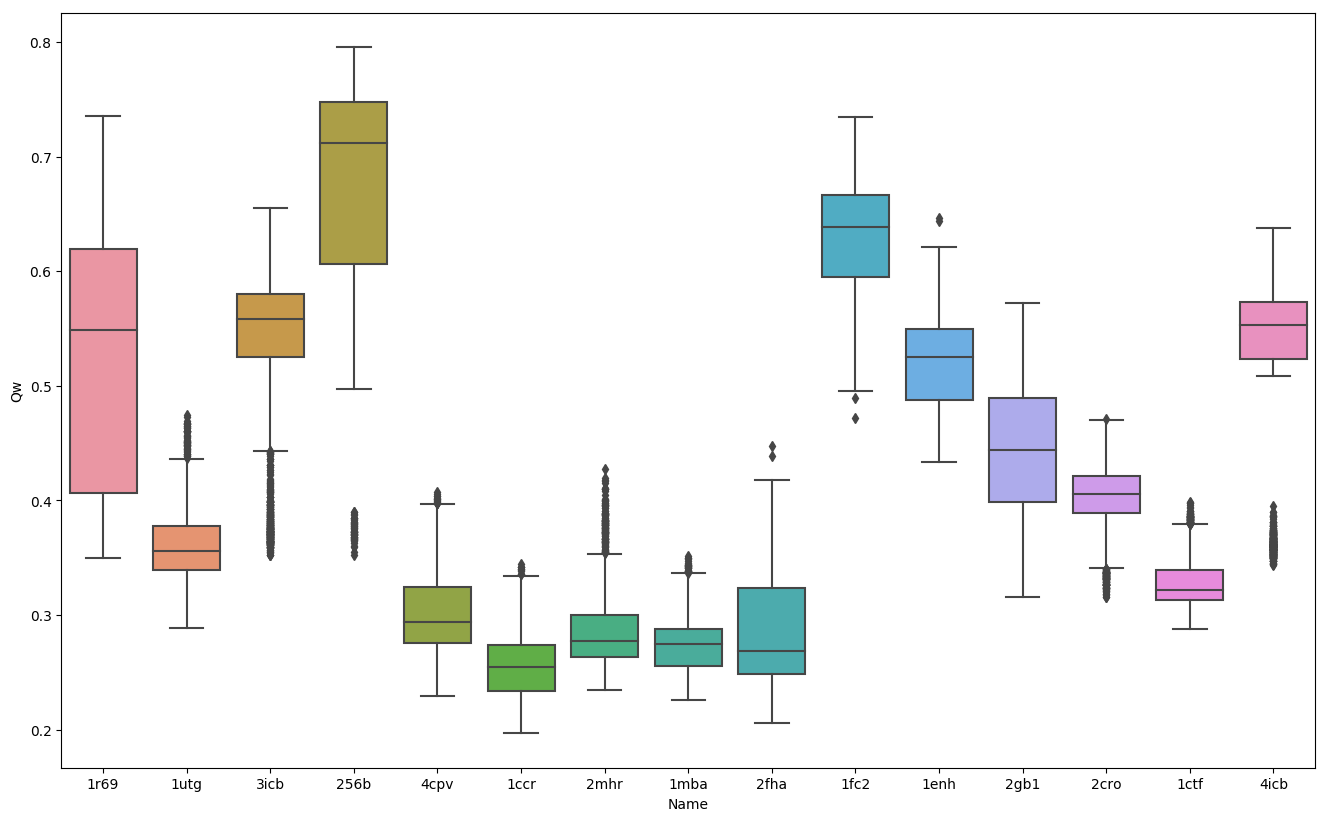

In [8]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "multi_iter0_fragMemory"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

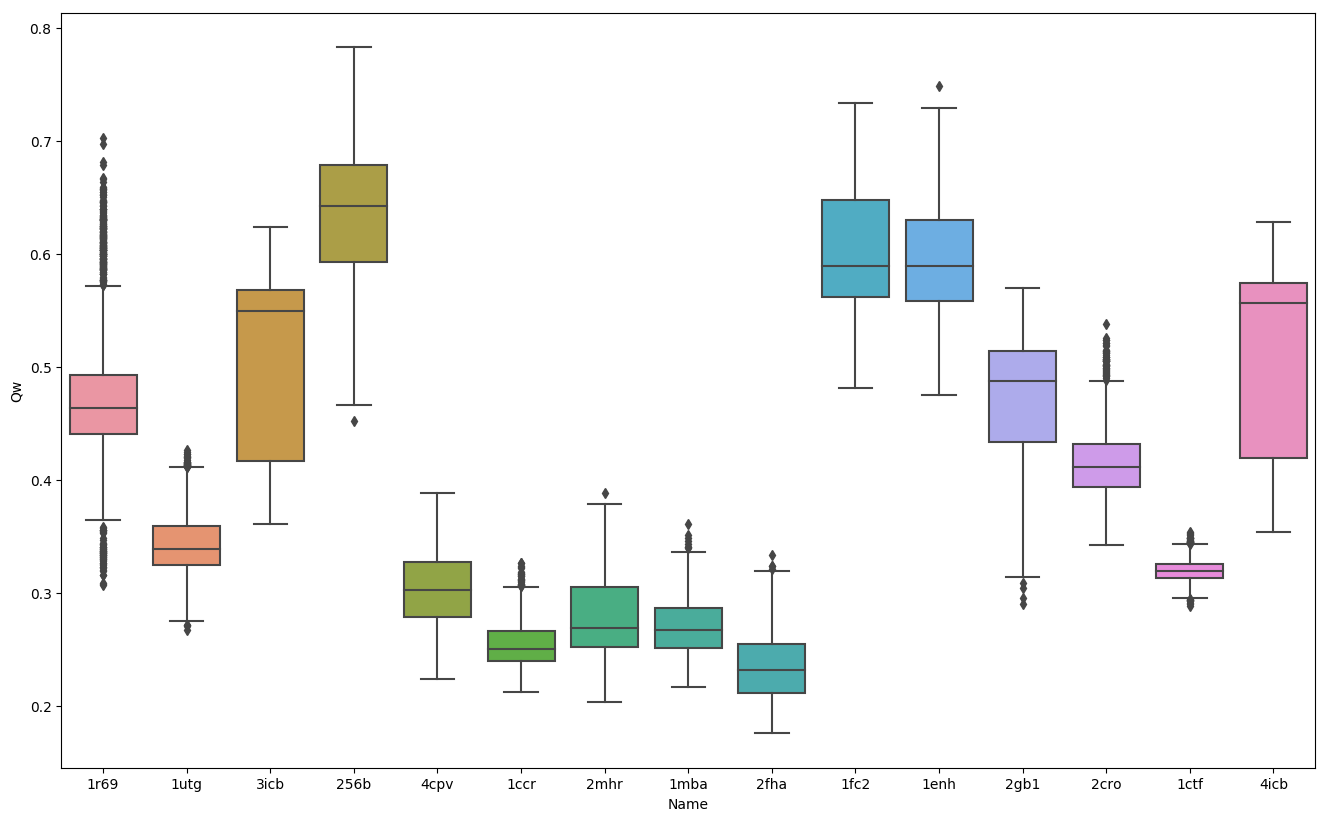

In [9]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "original_fragMemory"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

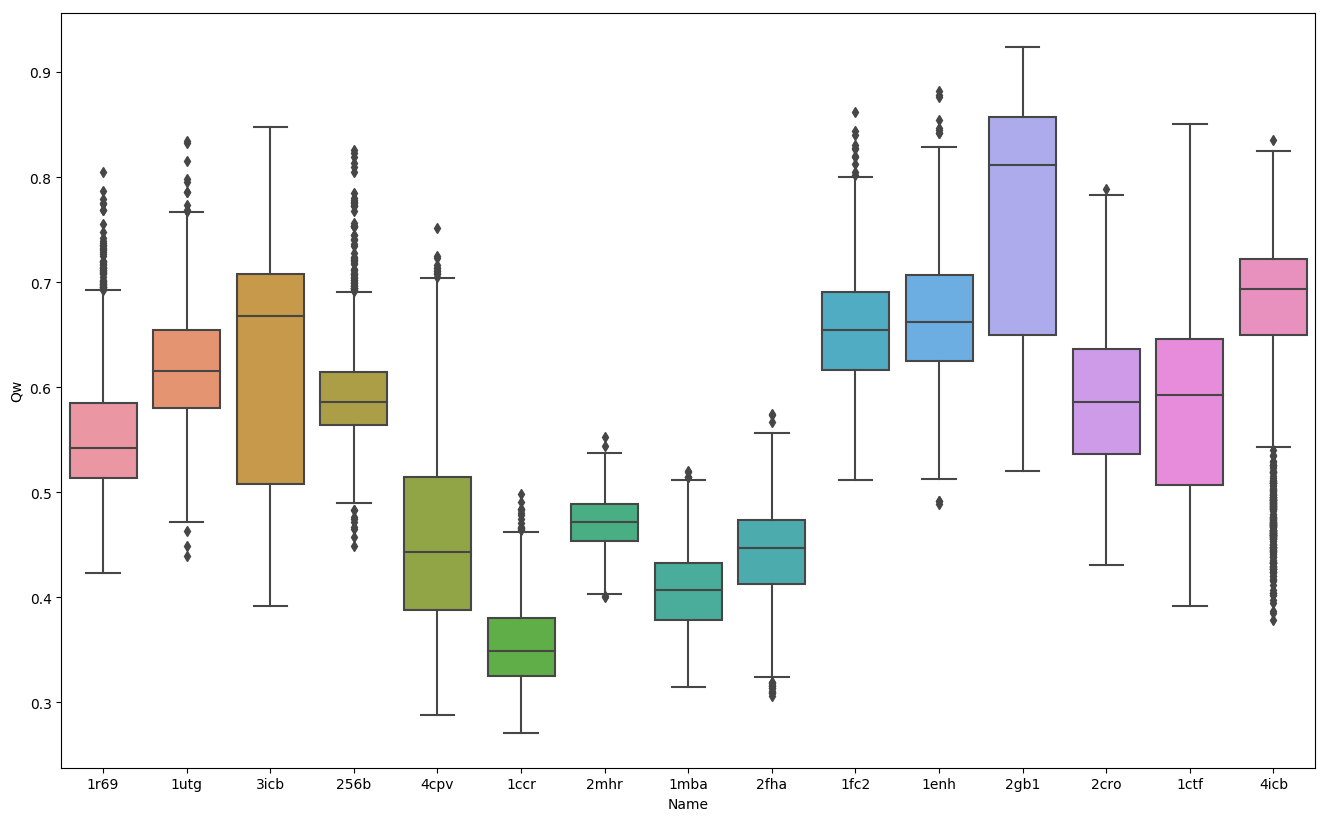

In [10]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "noContact"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

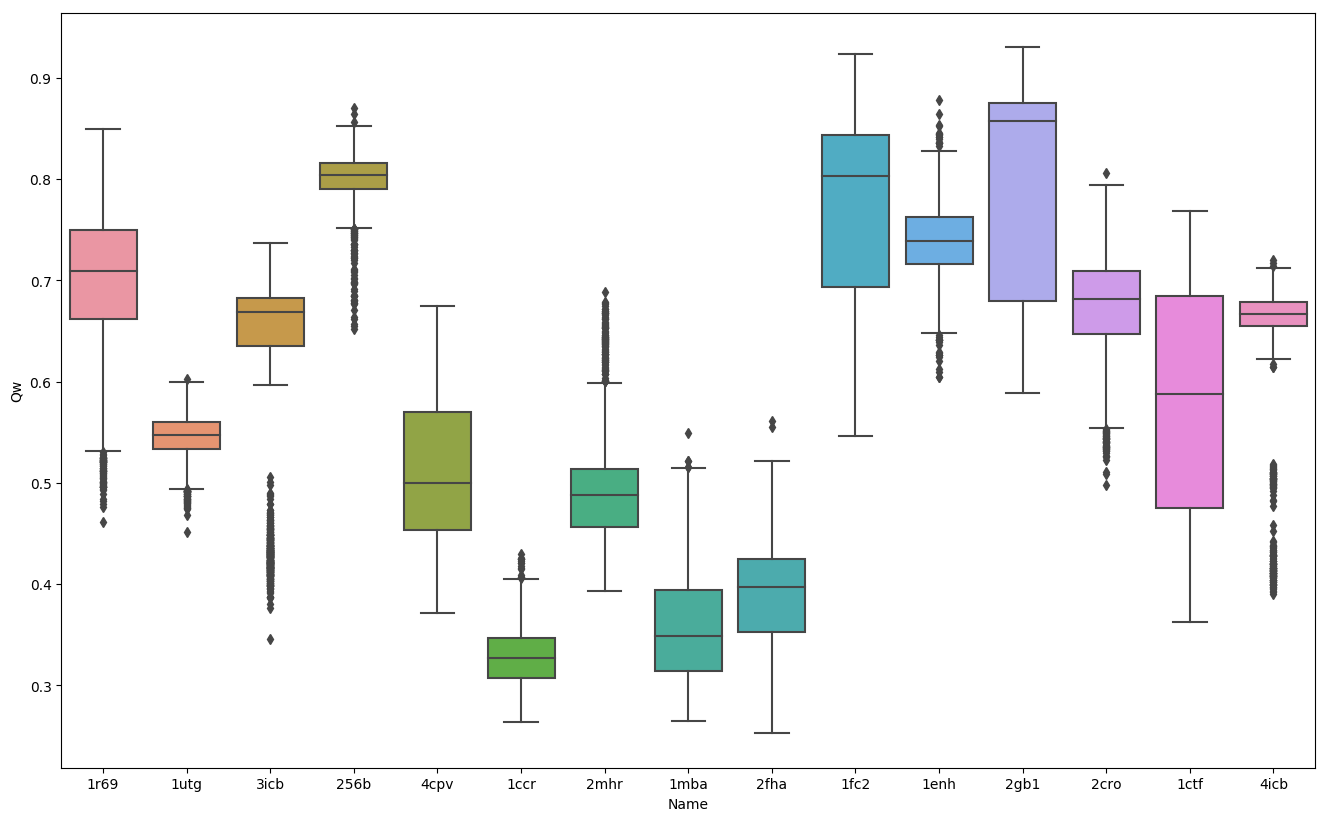

In [6]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "multi_iter0"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

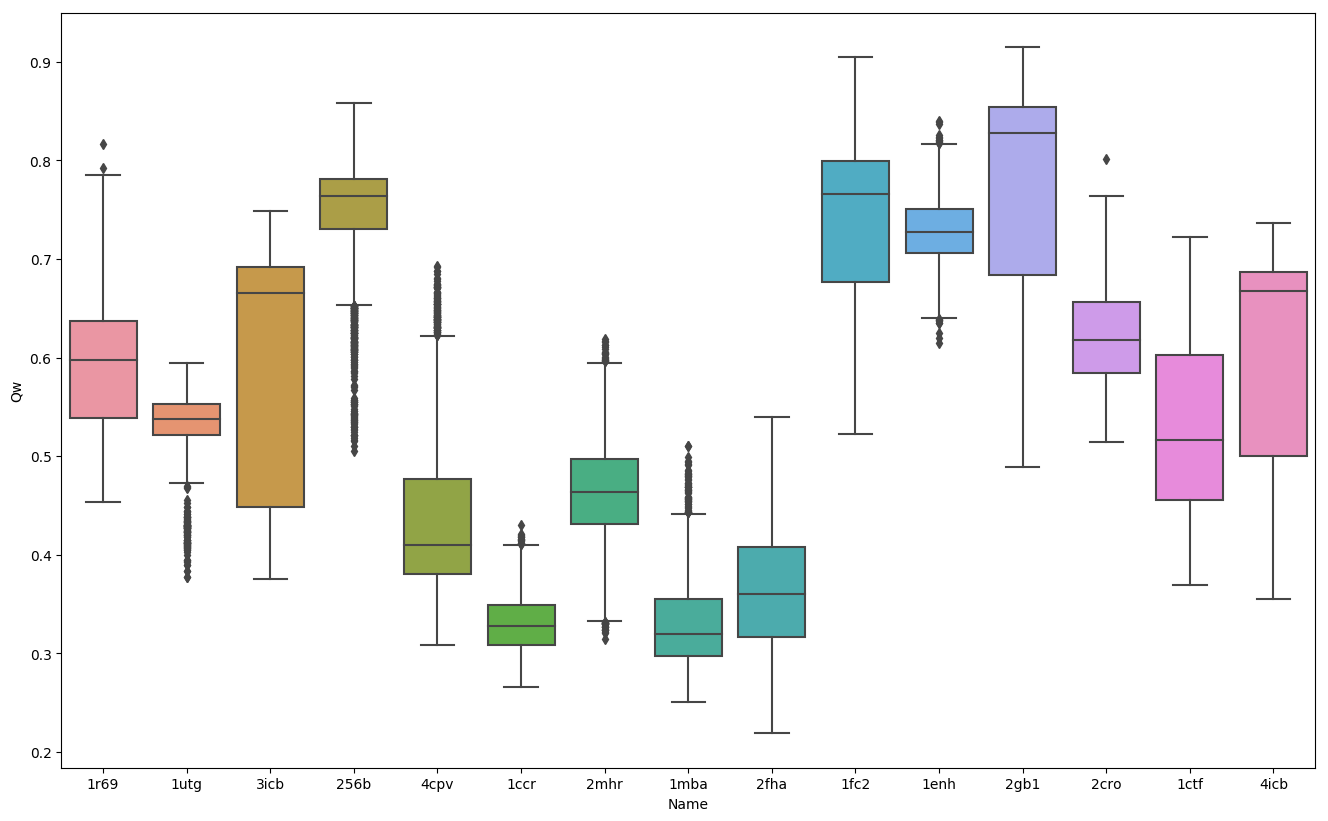

In [5]:
pre = "/Users/weilu/Research/server/may_2019/"
folder = "single_memory"
pre = pre + folder + "/"
simulationType = "original"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

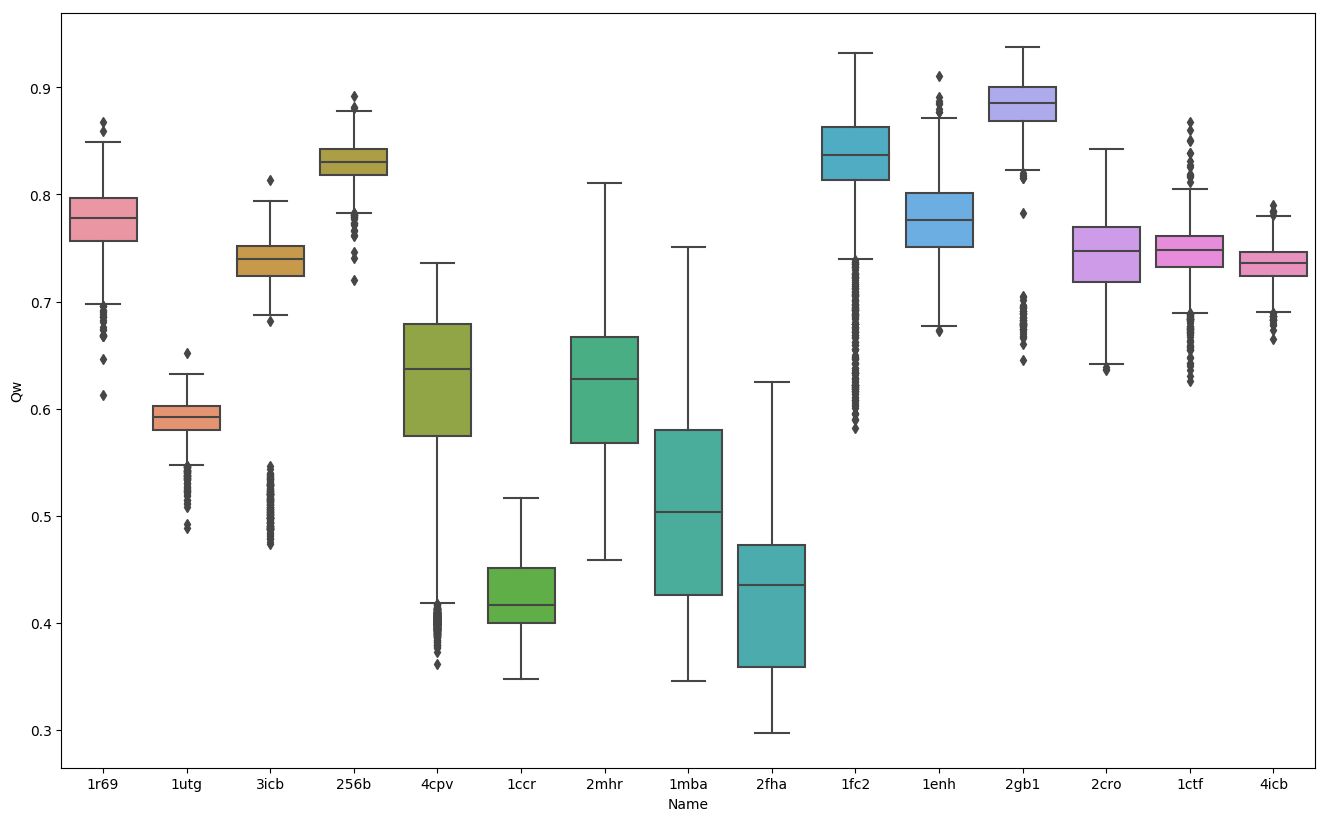

In [4]:
pre = "/Users/weilu/Research/server/single_memory_optimization/"
folder = "iterative_optimization_combined_train_set_singleMemory"
pre = pre + folder + "/"
simulationType = "original"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)